In [30]:
import pandas as pd
import numpy as np
import datetime
import random
import pylab
from matplotlib import pyplot
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import describe
from sklearn.neighbors import LocalOutlierFactor

In [3]:
################################
###       Prepare Data       ###
################################

In [4]:
cab_data = pd.read_csv('dataset_nyc_cabs.csv')

In [5]:
air_data = pd.read_csv('dataset_air_quality.csv').dropna()

In [6]:
def date_to_integer(date):
    return date.year * 10000 + date.month * 100 + date.day

def time_to_integer(time):
    return time.hour * 3600 + time.minute * 60 + time.second

cab_observations = cab_data.drop(['id', 'vendor_id', 'trip_duration', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], axis=1)
cab_observations['pickup_date'] = cab_data['pickup_datetime'].apply(
    lambda x: date_to_integer(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
)
cab_observations['pickup_time'] = cab_data['pickup_datetime'].apply(
    lambda x: time_to_integer(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time())
)
cab_observations['dropoff_date'] = cab_data['dropoff_datetime'].apply(
    lambda x: date_to_integer(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
)
cab_observations['dropoff_time'] = cab_data['dropoff_datetime'].apply(
    lambda x: time_to_integer(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time())
)
cab_labels = cab_data[['trip_duration']]

In [7]:
scaler = StandardScaler()
scaler.fit(cab_observations)
StandardScaler(copy=True, with_mean=True, with_std=True)
cab_observations_scaled = scaler.transform(cab_observations)

/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [8]:
cab_categories = np.array(pd.qcut(cab_labels['trip_duration'].tolist(), 3, labels=np.arange(0, 3)))

In [31]:
outlier_arr = LocalOutlierFactor().fit_predict(cab_observations_scaled)
cab_observations_scaled = cab_observations_scaled[np.where([True if i == 1 else False for i in outlier_arr])]
cab_categories = cab_categories[np.where([True if i == 1 else False for i in outlier_arr])]

/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [35]:
rand_idxs = range(cab_observations_scaled.shape[0])
random.shuffle(rand_idxs)
smp_idxs = rand_idxs[:100000]
final_test_idxs = rand_idxs[100000:115000]
cab_observations_smp = pd.DataFrame(cab_observations_scaled).iloc[smp_idxs]
cab_categories_smp = cab_categories[smp_idxs]
cab_observations_final_test = pd.DataFrame(cab_observations_scaled).iloc[final_test_idxs]
cab_categories_final_test = cab_categories[final_test_idxs]

In [10]:
describe(cab_observations_smp)

DescribeResult(nobs=100000, minmax=(array([  -1.26653225,  -19.47545762, -183.65178294,  -78.99013703,
       -238.79991292,   -1.58258122,   -2.20252333,   -1.58267176,
         -2.17262013]), array([ 3.29883797, 21.89308391,  9.72012191, 21.97222778, 81.41978367,
        1.56253587,  1.54432575,  1.9842834 ,  1.52504778])), mean=array([ 4.60174560e-05,  7.21184556e-04, -3.16813550e-03, -2.13381924e-03,
       -5.47931079e-03, -3.60996162e-03, -4.09091232e-03, -3.61037289e-03,
       -3.92954511e-03]), variance=array([1.00122516, 0.30359541, 1.07075611, 0.33575918, 1.45609784,
       1.00424427, 1.00354509, 1.00421041, 1.00307314]), skewness=array([ 2.13167666e+00,  3.25056941e+00, -5.65293792e+01, -2.24962529e+01,
       -7.45355624e+01, -5.95375725e-03, -4.43745383e-01, -5.89578415e-03,
       -4.61511020e-01]), kurtosis=array([ 3.44887778e+00,  5.27049207e+01,  9.92177165e+03,  3.50030498e+03,
        1.55434543e+04, -1.23197273e+00, -7.19589846e-01, -1.23163721e+00,
       -7.2476

In [ ]:
pyplot.yscale('log')
cab_labels['trip_duration'].hist()

In [11]:
cab_observations.head(100)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,-73.982155,40.767937,-73.964630,40.765602,20160314,62695,20160314,63150
1,1,-73.980415,40.738564,-73.999481,40.731152,20160612,2615,20160612,3278
2,1,-73.979027,40.763939,-74.005333,40.710087,20160119,41724,20160119,43848
3,1,-74.010040,40.719971,-74.012268,40.706718,20160406,70351,20160406,70780
4,1,-73.973053,40.793209,-73.972923,40.782520,20160326,48655,20160326,49090
5,6,-73.982857,40.742195,-73.992081,40.749184,20160130,79300,20160130,79743
6,4,-73.969017,40.757839,-73.957405,40.765896,20160617,81299,20160617,81640
7,1,-73.969276,40.797779,-73.922470,40.760559,20160521,28498,20160521,30049
8,1,-73.999481,40.738400,-73.985786,40.732815,20160527,83543,20160527,83798
9,1,-73.981049,40.744339,-73.973000,40.789989,20160310,78301,20160310,79526


In [12]:
def date_to_integer(date):
    return date.year * 10000 + date.month * 100 + date.day

air_observations = air_data.drop(['mortality_rate', 'region', 'date', 'Id'], axis=1)
air_observations['region'] = air_data['region'].apply(
    lambda x: x[1:]
)
air_observations['date'] = air_data['date'].apply(
    lambda x: date_to_integer(datetime.datetime.strptime(x, '%Y-%m-%d').date())
)
air_labels = air_data[['mortality_rate']]

In [13]:
scaler = StandardScaler()
scaler.fit(air_observations)
StandardScaler(copy=True, with_mean=True, with_std=True)
air_observations_scaled = scaler.transform(air_observations)

/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [14]:
air_categories = np.array(pd.qcut(air_labels['mortality_rate'].tolist(), 3, labels=np.arange(0, 3)))

In [15]:
rand_idxs = range(air_observations_scaled.shape[0])
random.shuffle(rand_idxs)
smp_idxs = rand_idxs[:10000]
final_test_idxs = rand_idxs[10000:11500]
air_observations_smp = pd.DataFrame(air_observations_scaled).iloc[smp_idxs]
air_categories_smp = air_categories[smp_idxs]
air_observations_final_test = pd.DataFrame(air_observations_scaled).iloc[final_test_idxs]
air_categories_final_test = air_categories[final_test_idxs]

In [153]:
################################
###        Clustering        ###
################################

In [74]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [155]:
cab_cluster = KMeans(n_clusters=8, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=1, random_state=None, copy_x=True).fit(cab_observations_smp)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 417940.9739430316
start iteration
done sorting
end inner loop
Iteration 1, inertia 392625.2858283661
start iteration
done sorting
end inner loop
Iteration 2, inertia 377174.0214736227
start iteration
done sorting
end inner loop
Iteration 3, inertia 362317.524513711
start iteration
done sorting
end inner loop
Iteration 4, inertia 351853.16303505836
start iteration
done sorting
end inner loop
Iteration 5, inertia 346340.683630713
start iteration
done sorting
end inner loop
Iteration 6, inertia 342080.78197692434
start iteration
done sorting
end inner loop
Iteration 7, inertia 338262.1708530747
start iteration
done sorting
end inner loop
Iteration 8, inertia 336001.1209005487
start iteration
done sorting
end inner loop
Iteration 9, inertia 335147.95730407746
start iteration
done sorting
end inner loop
Iteration 10, inertia 334649.36890981137
start iteration
done sorting
end inner loop
Iteration 11, in

Iteration 23, inertia 328660.3292735378
start iteration
done sorting
end inner loop
Iteration 24, inertia 328592.4195881467
start iteration
done sorting
end inner loop
Iteration 25, inertia 328530.84781487664
start iteration
done sorting
end inner loop
Iteration 26, inertia 328469.5159666138
start iteration
done sorting
end inner loop
Iteration 27, inertia 328407.0346514603
start iteration
done sorting
end inner loop
Iteration 28, inertia 328348.52366630343
start iteration
done sorting
end inner loop
Iteration 29, inertia 328295.50816502253
start iteration
done sorting
end inner loop
Iteration 30, inertia 328253.1885040122
start iteration
done sorting
end inner loop
Iteration 31, inertia 328217.2515836259
start iteration
done sorting
end inner loop
Iteration 32, inertia 328186.85730016645
start iteration
done sorting
end inner loop
Iteration 33, inertia 328161.7061651835
start iteration
done sorting
end inner loop
Iteration 34, inertia 328137.04906292376
start iteration
done sorting
en

Iteration 48, inertia 327255.6754222221
start iteration
done sorting
end inner loop
Iteration 49, inertia 327234.6485220398
start iteration
done sorting
end inner loop
Iteration 50, inertia 327207.6233486718
start iteration
done sorting
end inner loop
Iteration 51, inertia 327189.9143520272
start iteration
done sorting
end inner loop
Iteration 52, inertia 327174.5618404053
start iteration
done sorting
end inner loop
Iteration 53, inertia 327161.6079077548
start iteration
done sorting
end inner loop
Iteration 54, inertia 327150.2411358328
start iteration
done sorting
end inner loop
Iteration 55, inertia 327140.5759490459
start iteration
done sorting
end inner loop
Iteration 56, inertia 327131.50149144384
start iteration
done sorting
end inner loop
Iteration 57, inertia 327122.4020104652
start iteration
done sorting
end inner loop
Iteration 58, inertia 327114.9876222781
start iteration
done sorting
end inner loop
Iteration 59, inertia 327109.4405533467
start iteration
done sorting
end in

Iteration 1, inertia 362213.69033155026
start iteration
done sorting
end inner loop
Iteration 2, inertia 355222.2832200929
start iteration
done sorting
end inner loop
Iteration 3, inertia 351835.24809011054
start iteration
done sorting
end inner loop
Iteration 4, inertia 348539.59241007775
start iteration
done sorting
end inner loop
Iteration 5, inertia 346545.1097644995
start iteration
done sorting
end inner loop
Iteration 6, inertia 345355.14440145233
start iteration
done sorting
end inner loop
Iteration 7, inertia 344055.38288648974
start iteration
done sorting
end inner loop
Iteration 8, inertia 342180.497274314
start iteration
done sorting
end inner loop
Iteration 9, inertia 339164.2755979932
start iteration
done sorting
end inner loop
Iteration 10, inertia 335292.9732369557
start iteration
done sorting
end inner loop
Iteration 11, inertia 331810.18223920756
start iteration
done sorting
end inner loop
Iteration 12, inertia 329160.1836442249
start iteration
done sorting
end inner l

Iteration 1, inertia 397149.26501073333
start iteration
done sorting
end inner loop
Iteration 2, inertia 386084.3329177572
start iteration
done sorting
end inner loop
Iteration 3, inertia 379504.60905493004
start iteration
done sorting
end inner loop
Iteration 4, inertia 368874.58950680477
start iteration
done sorting
end inner loop
Iteration 5, inertia 353829.9507556454
start iteration
done sorting
end inner loop
Iteration 6, inertia 344981.8591146111
start iteration
done sorting
end inner loop
Iteration 7, inertia 341198.13905192167
start iteration
done sorting
end inner loop
Iteration 8, inertia 338932.7571786812
start iteration
done sorting
end inner loop
Iteration 9, inertia 336453.23202638986
start iteration
done sorting
end inner loop
Iteration 10, inertia 333703.39957881084
start iteration
done sorting
end inner loop
Iteration 11, inertia 331082.7259957438
start iteration
done sorting
end inner loop
Iteration 12, inertia 328881.49666494125
start iteration
done sorting
end inner

Iteration 4, inertia 368771.8157333733
start iteration
done sorting
end inner loop
Iteration 5, inertia 366913.2087546459
start iteration
done sorting
end inner loop
Iteration 6, inertia 365832.06805007585
start iteration
done sorting
end inner loop
Iteration 7, inertia 365006.0183877294
start iteration
done sorting
end inner loop
Iteration 8, inertia 364137.8120516902
start iteration
done sorting
end inner loop
Iteration 9, inertia 362978.22633558564
start iteration
done sorting
end inner loop
Iteration 10, inertia 360547.8893557951
start iteration
done sorting
end inner loop
Iteration 11, inertia 352584.10423092014
start iteration
done sorting
end inner loop
Iteration 12, inertia 334597.7005137874
start iteration
done sorting
end inner loop
Iteration 13, inertia 328264.6599631116
start iteration
done sorting
end inner loop
Iteration 14, inertia 327666.05837193807
start iteration
done sorting
end inner loop
Iteration 15, inertia 327524.3810154464
start iteration
done sorting
end inner

Iteration 63, inertia 327214.61635837617
start iteration
done sorting
end inner loop
Iteration 64, inertia 327212.85552239703
start iteration
done sorting
end inner loop
Iteration 65, inertia 327211.3028869573
start iteration
done sorting
end inner loop
Iteration 66, inertia 327209.9160394026
start iteration
done sorting
end inner loop
Iteration 67, inertia 327209.0307019713
start iteration
done sorting
end inner loop
Iteration 68, inertia 327208.2851220549
start iteration
done sorting
end inner loop
Iteration 69, inertia 327207.6260936212
start iteration
done sorting
end inner loop
Iteration 70, inertia 327207.2195358807
center shift 7.814179e-03 within tolerance 8.186061e-05


In [156]:
cab_cluster.labels_

array([5, 5, 7, ..., 5, 4, 2], dtype=int32)

In [157]:
cab_categories_smp

array([2, 1, 1, ..., 1, 0, 1])

In [158]:
preds = cab_cluster.predict(cab_observations_smp)
cluster_classes = [[0] * 3 for _ in range(8)]
for i in range(len(preds)):
    cluster_classes[preds[i]][cab_categories_smp[i]] += 1

In [159]:
cluster_classes

[[122, 121, 2051],
 [6552, 6834, 5810],
 [5990, 5787, 5205],
 [5679, 5597, 5428],
 [4945, 4540, 4455],
 [3955, 4647, 5200],
 [3078, 2670, 2222],
 [2985, 3069, 3058]]

In [71]:
def getPredictionClasses(predictions, labels, num_clusters):
    cluster_classes = [[0] * 3 for _ in range(num_clusters)]
    for i in range(len(predictions)):
        cluster_classes[predictions[i]][labels[i]] += 1
    prediction_classes = []
    for cluster in cluster_classes:
        prediction_class = 0
        maxCount = 0
        for i in range(len(cluster)):
            if cluster[i] > maxCount:
                maxCount = cluster[i]
                prediction_class = i
        prediction_classes.append(prediction_class)
    return prediction_classes, cluster_classes

In [228]:
def runKMeans(xs, ys):
    cv = ShuffleSplit(n_splits=5, train_size=.7, test_size=.3, random_state=0)
    accuracies = []
    for num_clusters in range(5, 51, 5):
        cluster_accuracies = []
        for idxs in cv.split(xs, ys):
            train_data = xs.iloc[idxs[0]]
            train_labels = ys[idxs[0]]
            test_data = xs.iloc[idxs[1]]
            test_labels = ys[idxs[1]]
            clusters = KMeans(n_clusters=num_clusters, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(train_data)
            pred_classes, counts = getPredictionClasses(clusters.predict(train_data), train_labels, num_clusters)
            acc = accuracy_score(test_labels, [pred_classes[p] for p in clusters.predict(test_data)])
            print "Clusters: %d, Accuracy %f" % (num_clusters, acc)
            print "Centers:"
            print clusters.cluster_centers_
            print "Class Counts:"
            print counts
            print "Cluster Classes:"
            print pred_classes
            cluster_accuracies.append(acc)
        print "Average Accuracy for %d Clusters: %f" % (num_clusters, np.mean(cluster_accuracies))
        accuracies.append(cluster_accuracies)
    return accuracies

In [229]:
cab_kmeans_accuracies = runKMeans(cab_observations_smp, cab_categories_smp)

Clusters: 5, Accuracy 0.359500
Centers:
[[-3.07150153e-01 -1.33460870e-02  1.58119146e-02 -3.58397805e-02
   3.02354797e-02 -8.77192171e-01  7.03856289e-01 -8.77331281e-01
   7.28802074e-01]
 [ 2.64517552e+00 -1.66941764e-02  3.28414492e-02 -4.25445947e-02
   8.34632146e-03 -2.31489040e-02  9.60595813e-02 -2.32242738e-02
   8.94368082e-02]
 [-3.17971495e-01 -3.39825515e-02 -4.72037400e-03 -2.12634090e-02
  -2.06213188e-02 -8.82524661e-01 -9.37212550e-01 -8.82563129e-01
  -9.54976351e-01]
 [-3.00445799e-01 -2.41324955e-03  2.95171060e-03 -3.66777077e-02
   1.76985089e-02  8.67072117e-01  7.28679202e-01  8.66793934e-01
   7.57047206e-01]
 [-3.11530786e-01 -4.30742485e-02  2.10764809e-02 -1.38944253e-02
   1.79336677e-02  8.76299357e-01 -9.23289157e-01  8.76165569e-01
  -9.49387914e-01]]
Class Counts:
[[6386, 6462, 5299], [2435, 2252, 1983], [5126, 4502, 3676], [5780, 6035, 6001], [5219, 4600, 4244]]
Cluster Classes:
[1, 0, 0, 1, 0]
Clusters: 5, Accuracy 0.358600
Centers:
[[ 2.65427906e+0

Clusters: 10, Accuracy 0.384767
Centers:
[[-0.34715502 -0.02384138  0.2538339  -0.02564152  0.18613271  0.92810014
  -0.50275184  0.92798446 -0.54332894]
 [-0.29922051 -0.24680484 -0.48976625 -0.16880133 -0.76813312 -0.27728321
   0.73134024 -0.2774371   0.73900491]
 [-0.30655123 -0.11749809 -0.05193566 -0.09698945 -0.12861182  1.20725432
   0.8432219   1.20695209  0.86682312]
 [-0.18307124 -0.18282055 -0.32651284 -0.00935571 -0.35042233  0.59890593
  -1.78938831  0.5986454  -1.73541075]
 [ 2.64473522 -0.07160154  0.07933442 -0.04525665  0.01531609 -0.87642926
   0.07791655 -0.87651546  0.07726915]
 [-0.34537166 -0.07156221  0.09382722 -0.03353861  0.04706348 -0.94414259
  -0.88222668 -0.94418585 -0.89562378]
 [ 2.63558919 -0.06913974  0.08956988 -0.04553802  0.03011486  0.8534453
   0.14837297  0.85323634  0.14321403]
 [-0.31807072  0.08098748  0.54488302  0.10034294  0.64629048  0.11279239
   0.64601516  0.11258482  0.66130265]
 [-0.32392378 -0.02990972  0.22335459 -0.01987612  0.243

Clusters: 15, Accuracy 0.401333
Centers:
[[-0.31721233  0.11921007  0.63212514  0.1340247   0.71480527  0.86382405
   0.70714025  0.86354636  0.72808383]
 [ 0.01504581 -0.02036679  0.09043948  2.43712284 -2.98387561  0.10246285
  -0.18982544  0.10234234 -0.12729409]
 [-0.14027641 -0.17504868 -0.3244353  -0.03272327 -0.306685   -0.92307737
  -1.82902078 -0.92321384 -1.77555872]
 [-0.34055364 -0.06521178  0.10939578 -0.08798844  0.02307449  1.2056432
  -0.45370486  1.20553529 -0.49873918]
 [ 2.65903264 -0.0669459   0.09405052 -0.07702387  0.06299011  0.85585167
   0.15299952  0.85564488  0.14545057]
 [-0.3605466  -0.02567439  0.24793669 -0.04136763  0.16402274 -1.22220771
  -0.48165084 -1.22223102 -0.50013429]
 [-0.34434494 -0.19326454 -0.23359473 -0.22540128 -0.27699648 -0.07888739
  -0.354054   -0.07893924 -0.40839618]
 [-0.32733484  0.12091457  0.61534386  0.13930742  0.7281299  -0.87850433
   0.72758468 -0.87864167  0.7476022 ]
 [-0.30136473 -0.20670418 -0.31894233 -0.20362932 -0.425

Clusters: 20, Accuracy 0.394733
Centers:
[[-0.2913878  -0.18814453 -0.34874882 -0.06224854 -0.40498627  0.91584966
  -1.84892137  0.9155631  -1.79571057]
 [-0.33472504 -0.27252377 -0.50042171 -0.30794732 -0.53731645  0.89417542
  -0.32344671  0.89421473 -0.41442794]
 [-0.30686873 -0.22056278 -0.36118744 -0.20545852 -0.49073426 -1.19438906
   0.9374379  -1.19450029  0.95756941]
 [-0.35123909 -0.28007907 -0.51252003 -0.3069233  -0.53895592 -0.93169941
  -0.33560866 -0.93166277 -0.40676032]
 [-0.34831976  0.01370295  0.35031139 -0.01722096  0.23507986 -0.01793801
  -0.49730543 -0.01806572 -0.50904867]
 [-0.31969312  0.0830818   0.72733258  0.41893212  1.48858309  0.17498815
  -1.5887573   0.17480773 -1.56082511]
 [-0.31704449  0.07819431  0.52878375  0.09848078  0.60980771 -1.19122446
   0.73862295 -1.19133801  0.75985237]
 [-0.36395755  0.06488965  0.49266049  0.05326718  0.4066285  -1.22096123
  -0.52257841 -1.22100155 -0.53063072]
 [-0.03915885  2.6569782  -3.18710829  0.38319205 -0.60

Clusters: 25, Accuracy 0.406100
Centers:
[[ 2.68070370e+00 -6.96733628e-02  7.93050080e-02 -6.84829552e-02
   1.81782113e-02 -8.66727832e-01 -8.56422840e-01 -8.66747839e-01
  -8.93965480e-01]
 [-3.63725801e-01 -2.35327261e-01 -3.38140452e-01 -2.59954793e-01
  -3.87179548e-01 -1.18976531e+00 -3.07837720e-01 -1.18974850e+00
  -3.55480014e-01]
 [-3.23380671e-01  8.50314059e-02  5.08409604e-01  5.40227445e-02
   4.29043765e-01  1.16123840e+00  7.05221110e-02  1.16102599e+00
   5.10968689e-02]
 [-3.71007681e-01  6.35418830e-02  5.16141654e-01  9.27141117e-02
   4.45573148e-01  1.19242046e+00 -9.02869785e-01  1.19211575e+00
  -8.59978840e-01]
 [-2.86255069e-01 -2.42646369e-01 -8.34204875e-01 -1.82983173e-01
  -1.69383009e+00 -4.87032603e-01  9.42381158e-01 -4.87194520e-01
   9.69804983e-01]
 [-3.62747008e-01  9.82296549e-02  5.69346501e-01  8.36716095e-02
   4.68531289e-01 -1.20335887e+00 -5.68694291e-01 -1.20341245e+00
  -5.68854679e-01]
 [ 2.62371083e+00 -7.01991947e-02  8.58153649e-02 -8.

Clusters: 25, Accuracy 0.398633
Centers:
[[ 2.60564969e+00 -8.39788555e-02  5.03683034e-02 -9.82065297e-02
   1.58994685e-02  8.58686058e-01  8.30407001e-01  8.58414599e-01
   8.53630835e-01]
 [-3.51621321e-01  9.71141280e-02  5.70415030e-01  6.75975785e-02
   4.26408154e-01 -2.66544443e-03 -5.60653222e-01 -2.82718705e-03
  -5.53416307e-01]
 [ 2.61756600e+00 -8.86748741e-02  3.21705233e-02 -9.27592671e-02
   2.37302134e-02 -8.68709748e-01  8.75359528e-01 -8.68850040e-01
   8.94548563e-01]
 [-3.11506952e-01  9.96265777e-02  5.81688218e-01  1.20476676e-01
   6.70937468e-01  1.21979263e+00  7.50967223e-01  1.21947932e+00
   7.74702577e-01]
 [-2.89573812e-01 -1.79133311e-01 -2.23826483e-01 -3.87693286e-02
  -1.12196702e-01  9.97127816e-01 -1.82873740e+00  9.96835182e-01
  -1.77785448e+00]
 [-3.05037614e-01  7.66243637e-02  7.19219059e-01  4.75226205e-01
   1.73830557e+00  2.00572888e-01 -1.66263197e+00  2.00407243e-01
  -1.63876791e+00]
 [-3.09088881e-01 -2.41752208e-01 -4.62368564e-01 -2.

Clusters: 30, Accuracy 0.405867
Centers:
[[-2.84566360e-01 -1.96999637e-01 -2.91602104e-01 -8.03497817e-02
  -2.50132774e-01  1.18862454e+00 -1.88918163e+00  1.18832156e+00
  -1.83688759e+00]
 [ 2.69002254e+00 -6.99145186e-02  9.08058353e-02 -6.73401651e-02
   3.55933804e-02 -8.67517633e-01 -8.40199333e-01 -8.67537243e-01
  -8.78281230e-01]
 [-5.93211711e-02  2.65982885e+00 -3.17690215e+00  3.57388638e-01
  -6.42646340e-01 -8.94591844e-01  1.56494467e-01 -8.94568840e-01
   1.60801943e-01]
 [-3.23572563e-01 -2.59873476e-01 -4.25295593e-01 -2.84430368e-01
  -4.51752054e-01  1.16276595e+00 -3.13873376e-01  1.16282004e+00
  -4.09275864e-01]
 [-3.22023548e-01  1.50157548e-01  8.16904805e-01  2.18807358e-01
   1.13679809e+00 -8.43287050e-02  8.34869734e-01 -8.45333748e-02
   8.51178029e-01]
 [-3.34246957e-01  7.72901272e-02  4.85898769e-01  5.76181435e-02
   4.29145392e-01 -1.18907832e+00  7.28687592e-02 -1.18911770e+00
   5.85273338e-02]
 [-3.08870728e-01  3.51325115e-02  6.76464248e-01  4.

Clusters: 30, Accuracy 0.400100
Centers:
[[-3.36372718e-01  8.71275966e-02  4.73132138e-01  5.61295695e-02
   3.91044678e-01 -1.20489292e+00  5.75824747e-02 -1.20491605e+00
   3.04416745e-02]
 [-2.48743392e-01 -8.54946753e-02 -1.04975451e+00  6.54825360e-02
  -2.13844939e+00  1.46976059e-01 -1.74866819e+00  1.46814050e-01
  -1.71997311e+00]
 [-2.79838379e-01 -1.83827940e-01 -2.64149407e-01 -6.08865750e-02
  -2.04695072e-01  1.19854930e+00 -1.87573194e+00  1.19824238e+00
  -1.82381473e+00]
 [-3.36329406e-01  1.75344469e-01  9.63369079e-01  2.55222739e-01
   1.34809958e+00 -9.08491891e-01  7.85130980e-01 -9.08613155e-01
   7.93669394e-01]
 [-3.60779805e-01  1.60226045e-01  7.62711148e-01  1.88194218e-01
   6.87920970e-01 -1.19718821e+00 -8.57853973e-01 -1.19728190e+00
  -8.24019021e-01]
 [-2.99025586e-01 -2.55943083e-01 -5.20799555e-01 -2.31512293e-01
  -7.24489335e-01 -1.17016144e+00  1.00822514e+00 -1.17027849e+00
   1.02796391e+00]
 [-3.46773918e-01 -2.59560851e-01 -4.24305791e-01 -2.

Clusters: 30, Accuracy 0.398933
Centers:
[[ 2.63475502e+00 -8.10006930e-02  6.90229100e-02 -8.12171437e-02
   4.44273223e-02 -8.63372130e-01  7.08930168e-01 -8.63513960e-01
   7.30035864e-01]
 [-3.07279441e-01  8.73498879e-02  5.53500540e-01  1.03850660e-01
   6.17002899e-01  1.26299357e+00  8.98982931e-01  1.26267887e+00
   9.19315509e-01]
 [-2.85346156e-01 -2.00934599e-01 -4.03488967e-01 -8.28779155e-02
  -4.89398601e-01 -1.90958148e-02 -1.86549446e+00 -1.93051141e-02
  -1.81189826e+00]
 [-3.59434833e-01 -2.59178176e-01 -4.34111760e-01 -2.99372725e-01
  -4.70983683e-01  1.20353208e+00 -6.98701687e-01  1.20322868e+00
  -6.56658353e-01]
 [-2.95442875e-01 -9.55235820e-02  8.88966202e-02 -6.96750726e-02
   1.35733477e-01  4.74971216e-01  1.00761300e+00  4.74725994e-01
   1.02748023e+00]
 [-2.73550999e-01 -1.83611171e-01 -3.27996725e-01 -4.72242626e-02
  -3.68392427e-01  1.18254708e+00 -1.91328398e+00  1.18224122e+00
  -1.85875531e+00]
 [ 2.08982047e-03 -3.45581478e-02  5.07165042e-02  2.

Clusters: 35, Accuracy 0.410467
Centers:
[[-0.3757468   0.03641284  0.44273616  0.03392997  0.3350745  -1.1912214
  -0.81582182 -1.19133535 -0.77612954]
 [-0.31083588  0.10163967  0.58795339  0.10680716  0.66186628 -1.18844207
   0.95221759 -1.18855421  0.96810349]
 [ 2.6477053  -0.18490427 -0.27407064 -0.13319815 -0.30216579  0.86950418
  -1.23961616  0.86935555 -1.25636014]
 [ 2.6980958   0.07259225  0.54814147  0.06193877  0.48138123 -0.86666201
  -0.19455742 -0.86673592 -0.20364229]
 [-0.29761431 -0.18328591 -0.18463062 -0.16855799 -0.2112785  -0.30785933
   0.92670289 -0.30804727  0.9465289 ]
 [-0.29531833 -0.08073905  0.12358148  0.20998113  0.60634865  1.10702088
  -1.89588612  1.10672933 -1.84018165]
 [-0.3003431  -0.17732455 -0.35142895 -0.04270242 -0.40044058 -1.22036302
  -1.88932373 -1.22047266 -1.8361035 ]
 [-0.25855691  0.05446217  0.61491223  0.41449968  1.51050209 -0.4749011
  -1.77053832 -0.47506564 -1.71366282]
 [-0.30337398  0.18541623  0.7330858   0.68027789  2.6755

Clusters: 35, Accuracy 0.405700
Centers:
[[-3.62946232e-01 -2.95770966e-01 -5.85640482e-01 -3.43966089e-01
  -6.59310056e-01 -1.18307228e+00 -2.76616979e-01 -1.18298919e+00
  -3.65087502e-01]
 [-4.07203968e-01 -7.82643752e-02  1.44061268e-01 -1.00942054e-01
   5.76813622e-02 -1.20859426e+00 -8.43023431e-01 -1.20870765e+00
  -8.03117297e-01]
 [-3.06131961e-01 -2.31089375e-01 -5.22471453e-01 -1.53568104e-01
  -7.53851881e-01  8.97474360e-01 -1.87545031e+00  8.97188333e-01
  -1.82165032e+00]
 [ 1.10592137e+00 -5.16412346e-02  2.30576625e-01 -7.42539040e-02
   1.90409252e-01  8.68738760e-01  6.24995040e-01  8.68479935e-01
   6.38086315e-01]
 [-3.35766365e-01 -1.19058968e-01  3.65496611e-02 -9.33417265e-02
   5.32310018e-02 -1.19376605e+00  1.05002728e+00 -1.19387630e+00
   1.06683981e+00]
 [-3.39198660e-01 -1.20419806e-01  5.09790695e-02 -5.92622338e-02
   1.59434498e-01 -1.75932447e-02  1.07314582e+00 -1.77981403e-02
   1.09068887e+00]
 [-5.40491038e-02  2.64793881e+00 -3.19770914e+00  3.

Clusters: 40, Accuracy 0.427233
Centers:
[[-2.84262318e-02  2.66334012e+00 -3.20389100e+00  4.08524886e-02
   5.16151196e-02  4.02460278e-02  2.74547699e-01  4.02017541e-02
   2.89240509e-01]
 [-2.73890327e-01 -2.05364788e-01 -3.75416610e-01 -8.22506098e-02
  -4.53412160e-01  1.18123183e+00 -1.92158577e+00  1.18093037e+00
  -1.86771085e+00]
 [-3.65592241e-01  7.08177049e-02  5.14427291e-01  8.02748048e-02
   5.63103577e-01 -1.19103356e+00  9.69847477e-01 -1.19114419e+00
   9.86022910e-01]
 [-3.56603640e-01  1.22982518e-01  8.48107328e-01  1.39571998e-01
   8.63743794e-01 -3.20692242e-02  6.77288746e-01 -3.22808877e-02
   6.93832714e-01]
 [ 1.29432954e+00 -9.12142255e-02  6.71325442e-02 -1.03113192e-01
   6.20245411e-02 -8.08476067e-01  6.74445218e-01 -8.08622729e-01
   6.96798876e-01]
 [-3.74094043e-01 -2.93202616e-01 -4.80025284e-01 -2.29667430e-01
  -2.81954193e-01  1.17083320e+00  4.49637422e-01  1.17052880e+00
   4.80455517e-01]
 [-3.23883106e-01 -3.33395657e-01 -7.00218949e-01 -3.

Clusters: 40, Accuracy 0.413400
Centers:
[[-3.25692553e-01 -3.21890407e-01 -6.93947275e-01 -3.94613560e-01
  -7.73543323e-01  1.13307231e+00 -4.28058176e-01  1.13279474e+00
  -3.91671858e-01]
 [-3.21130986e-01  7.01722129e-02  6.84105559e-01  1.18500732e-01
   6.26782783e-01  5.26427812e-01  3.53159058e-01  5.26170955e-01
   3.79630014e-01]
 [-3.07554749e-01 -1.06120842e-01  3.59320644e-02  1.07573656e-01
   3.40135612e-01 -9.25528614e-01 -1.90730521e+00 -9.25661629e-01
  -1.85407164e+00]
 [-3.20254576e-01 -2.25362863e-01 -2.49756781e-01 -2.25955394e-01
  -2.53757837e-01 -1.86482434e-02  5.53715061e-02 -1.88497853e-02
   9.05223110e-02]
 [-3.40666827e-01 -2.58524629e-01 -4.67785133e-01 -2.40697236e-01
  -5.53082915e-01 -1.19199926e+00  9.87158599e-01 -1.19211462e+00
   1.00519950e+00]
 [ 2.68961070e+00 -6.62755838e-02  5.96381865e-02 -7.76456080e-02
  -1.05128537e-02 -1.21108354e+00 -9.18696689e-01 -1.21110394e+00
  -9.37952118e-01]
 [-3.88063629e-01 -1.70554150e-01 -1.13947342e-01 -1.

Clusters: 40, Accuracy 0.412233
Centers:
[[-4.05048049e-01 -1.74855755e-01 -1.30871840e-01 -1.72949913e-01
  -1.26433309e-01  4.44246140e-03 -7.91030871e-01  4.23356389e-03
  -7.49550503e-01]
 [ 6.39365558e-03 -4.11807756e-02  6.41686403e-02  2.60051446e+00
  -2.94118284e+00  4.37765020e-02 -1.44431828e-01  4.35893689e-02
  -3.44198557e-02]
 [-3.65797046e-01 -9.72168745e-02  5.71327854e-02 -1.15109173e-01
   5.36167289e-05 -3.25436903e-01  1.34200273e-01 -3.25622665e-01
   1.68186980e-01]
 [ 2.76478253e+00 -7.57889301e-02  6.70048237e-02 -8.13911478e-02
  -1.16263142e-03 -9.92493196e-01 -7.83768993e-01 -9.92523957e-01
  -8.06329043e-01]
 [-3.04830394e-01 -1.61355879e-02  4.70850275e-01  4.11210316e-01
   1.60277981e+00  5.30733170e-01 -1.84629134e+00  5.30482035e-01
  -1.78584060e+00]
 [ 2.82445667e+00 -8.85702208e-02 -2.52188095e-03 -1.01667628e-01
  -2.32509992e-02  8.42960710e-01  8.83414297e-01  8.42705570e-01
   9.05041140e-01]
 [ 2.67552689e+00 -9.16333728e-02  2.17281033e-02 -9.

Clusters: 45, Accuracy 0.424267
Centers:
[[-3.51571691e-01  2.07504376e-01  8.80313406e-01  2.31464336e-01
   7.41821026e-01  1.18999368e+00 -7.53861396e-01  1.18969887e+00
  -7.23210611e-01]
 [ 2.74109012e+00  9.27671681e-02  6.04640652e-01  8.63367652e-02
   5.22763785e-01 -1.02132545e+00 -3.77933984e-01 -1.02139712e+00
  -3.78318203e-01]
 [-3.02272701e-01 -2.47508360e-01 -3.03930239e-01 -2.04622160e-01
  -1.94883044e-01  1.08865428e+00  2.77042994e-01  1.08835852e+00
   3.11648669e-01]
 [ 2.74736961e+00  8.40151824e-03  3.11083074e-01 -3.87450182e-02
   1.91166209e-01  9.79512110e-01 -3.76301360e-01  9.79334565e-01
  -4.01623087e-01]
 [ 2.59472614e+00 -1.68227336e-01 -3.08515936e-01 -6.27055415e-02
  -2.15693965e-01  8.21401717e-01 -1.72756420e+00  8.21156873e-01
  -1.67878966e+00]
 [-3.47690645e-01 -1.50140066e-02  2.34083839e-01 -5.00018623e-02
   1.50610109e-01 -1.24543605e+00  8.30848887e-02 -1.24554943e+00
   1.16276551e-01]
 [-2.34889288e-01 -1.28807035e-01 -1.87806754e-01 -1.

Clusters: 45, Accuracy 0.418267
Centers:
[[-3.66793104e-01  1.15346346e-01  6.13379678e-01  1.30693015e-01
   4.47237861e-01  1.27350409e+00 -8.84691834e-01  1.27318791e+00
  -8.41112287e-01]
 [ 2.66005247e+00 -8.64725130e-02  2.78347394e-02 -9.58150585e-02
  -1.79490490e-02 -1.21093701e+00  8.67601324e-01 -1.21105728e+00
   8.86869052e-01]
 [-2.77121660e-01 -2.40609769e-01 -8.91198554e-01 -8.75206475e-02
  -2.04475536e+00 -7.82953746e-01  9.22987484e-01 -7.83069658e-01
   9.58128533e-01]
 [-2.94602459e-01 -1.64688037e-01 -5.90018658e-02 -1.61660833e-01
  -8.93550931e-02  1.47410023e+00 -8.44063310e-03  1.47377921e+00
   2.88851202e-02]
 [-4.08723539e-01 -1.00971161e-01  8.08563632e-02 -1.02524475e-01
   4.39635582e-02 -5.22893180e-01 -7.86785464e-01 -5.23063709e-01
  -7.46697370e-01]
 [-3.90622063e-01  6.49346445e-02  6.50071220e-01  1.18712721e-01
   6.11531761e-01 -4.49934425e-03  1.27392447e-01 -4.71613909e-03
   1.56592591e-01]
 [-3.85798299e-01 -2.31061879e-01 -3.06519548e-01 -2.

Clusters: 50, Accuracy 0.432267
Centers:
[[-3.13841359e-01 -1.60351887e-01 -1.52839528e-02 -1.60417657e-01
  -3.53058768e-02  1.18445751e+00  9.29083534e-03  1.18416279e+00
   4.61517230e-02]
 [-2.95459915e-01 -2.63444488e-02  5.06875844e-01  6.16887019e-01
   2.55187580e+00  6.54947556e-01 -1.52825267e+00  6.54823507e-01
  -1.54913519e+00]
 [-4.68415064e-02  2.66084730e+00 -3.20008556e+00  5.10678484e-02
  -6.97837412e-03  8.96011205e-01  2.58882466e-01  8.95854720e-01
   3.00240451e-01]
 [-3.59555530e-01 -3.02700388e-01 -5.43742150e-01 -2.92852386e-01
  -4.80797053e-01 -1.35247339e-02  3.56692910e-01 -1.37242654e-02
   3.86333127e-01]
 [ 2.72307018e+00 -8.26207534e-02  2.12189114e-02 -9.48235214e-02
  -4.19213522e-03 -9.03100674e-01  8.90953494e-01 -9.03232663e-01
   9.09799524e-01]
 [-3.72982052e-01 -2.49672117e-01 -3.79801681e-01 -2.15636926e-01
  -3.77290690e-01 -1.18319656e+00  1.02981925e+00 -1.18330860e+00
   1.04675586e+00]
 [-3.29804524e-01  1.65244540e-01  1.11522779e+00  3.

Clusters: 50, Accuracy 0.429300
Centers:
[[-0.36739827 -0.1424654   0.01511869 -0.1057386   0.02306598  1.47294942
   0.99566662  1.47261745  1.01609427]
 [ 2.59661892 -0.15587115 -0.27365948 -0.00759374 -0.15028615  0.81573732
  -1.85472486  0.81549927 -1.80382241]
 [ 2.71048149  0.13455899  0.69174535  0.11984038  0.61993569 -0.86389549
  -0.20800996 -0.86397613 -0.21275303]
 [-0.34003065 -0.32729603 -0.7042446  -0.39768002 -0.72807717  0.03088402
  -0.48460115  0.03067216 -0.44315559]
 [-0.34552336  1.48597246  0.61663838  0.13954422 -0.1785463  -0.88795467
   0.5091179  -0.88808972  0.57534771]
 [-0.37125692 -0.09250001  0.08242078 -0.10366007  0.01946346 -0.307776
  -0.73052254 -0.3079581  -0.68925889]
 [ 1.16185616 -0.12103137  0.09223414 -0.08280271  0.10914474  0.91641793
   0.78304076  0.91613412  0.806151  ]
 [-0.38251217 -0.05230646  0.2721401  -0.0069484   0.26057456  1.15056827
   0.09112963  1.15026829  0.12768235]
 [ 2.61365388 -0.13414778 -0.22144366  0.0369483  -0.1436

Clusters: 50, Accuracy 0.429500
Centers:
[[-2.92105406e-01 -1.94656678e-01 -2.91427010e-01 -7.78668103e-02
  -1.94732807e-01 -1.18125490e+00 -1.90905713e+00 -1.18136972e+00
  -1.85752843e+00]
 [-3.39730720e-01  2.26563188e-01  8.69344931e-01  1.58795582e-01
   8.32583722e-01 -1.16883341e+00  6.49641884e-01 -1.16894480e+00
   6.68711891e-01]
 [-3.09039115e-01 -3.17184803e-01 -6.38581199e-01 -2.52019110e-01
  -5.40278121e-01 -1.19571073e+00  9.39139991e-01 -1.19582960e+00
   9.54941059e-01]
 [ 2.64384070e+00 -2.13293785e-01 -3.13347381e-01 -2.44849127e-01
  -3.59626781e-01 -2.29458532e-01 -2.45902753e-01 -2.29488787e-01
  -3.08779920e-01]
 [-3.76063047e-01 -3.63269698e-03  2.65108749e-01 -3.47579007e-02
   1.56355589e-01 -3.06174603e-01 -8.10343962e-01 -3.06367263e-01
  -7.68023679e-01]
 [-3.64958427e-01 -1.60777331e-01 -5.60877746e-02 -1.46744271e-01
  -1.11483215e-02  6.02119086e-01 -8.26009604e-01  6.01865061e-01
  -7.85731565e-01]
 [-3.22574088e-01  1.47338170e+00  6.18473432e-01  5.

Clusters: 50, Accuracy 0.429300
Centers:
[[-2.76037692e-01 -2.92784098e-01 -5.73626999e-01 -2.54279231e-01
  -7.43247410e-01 -2.93568895e-01  9.79458370e-01 -2.93745231e-01
   9.99308136e-01]
 [-2.90246785e-01 -1.67760916e-01 -4.93624266e-02 -1.69321796e-01
  -9.03495882e-02 -3.08667458e-01  2.37019706e-02 -3.08845747e-01
   5.86201684e-02]
 [-3.59021133e-01 -3.13306115e-01 -6.32201925e-01 -3.58605482e-01
  -6.64267481e-01 -1.18965063e+00 -5.30404251e-01 -1.18977260e+00
  -4.91272649e-01]
 [ 2.62353187e+00  1.02788979e-01  5.64131066e-01  1.02864662e-01
   6.27834897e-01 -8.04159941e-01  6.55847273e-01 -8.04305411e-01
   6.76423077e-01]
 [-1.14476551e-02  2.66072522e+00 -3.18781368e+00  2.95933510e-01
  -6.22648046e-01 -8.87074381e-01  1.87649042e-01 -8.87036702e-01
   1.83579832e-01]
 [-3.27458688e-01  9.43140223e-02  7.31031429e-01  1.90016018e-01
   7.43167516e-01 -4.72400285e-02  4.15296179e-02 -4.74534039e-02
   7.13123584e-02]
 [-3.30076956e-01 -3.20416757e-01 -6.22965454e-01 -3.

In [275]:
cab_kmeans_accuracies

[[0.3595, 0.3586, 0.3572, 0.36423333333333335, 0.3578],
 [0.3826333333333333, 0.3849, 0.3807, 0.38476666666666665, 0.3783],
 [0.39026666666666665,
  0.39493333333333336,
  0.39203333333333334,
  0.4013333333333333,
  0.38876666666666665],
 [0.4016, 0.3970666666666667, 0.3947333333333333, 0.396, 0.3943333333333333],
 [0.4061, 0.4007, 0.39863333333333334, 0.3938, 0.39413333333333334],
 [0.40586666666666665,
  0.41286666666666666,
  0.4001,
  0.4117,
  0.3989333333333333],
 [0.4071666666666667,
  0.41046666666666665,
  0.41376666666666667,
  0.4057,
  0.4174333333333333],
 [0.42723333333333335, 0.423, 0.4134, 0.4235, 0.41223333333333334],
 [0.4125,
  0.4242666666666667,
  0.41836666666666666,
  0.4182666666666667,
  0.42556666666666665],
 [0.4222666666666667, 0.4192, 0.42233333333333334, 0.4295, 0.4083]]

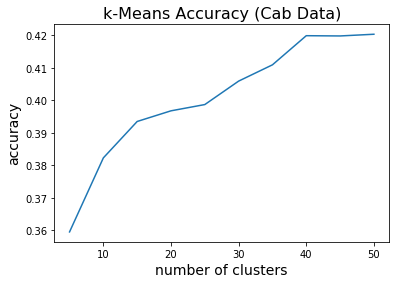

In [295]:
pyplot.title('k-Means Accuracy (Cab Data)', fontsize=16)
pyplot.xlabel('number of clusters', fontsize=14)
pyplot.ylabel('accuracy', fontsize=14)
pyplot.plot(range(5, 5*len(cab_kmeans_accuracies)+5, 5), np.mean(cab_kmeans_accuracies, axis=1))

In [345]:
np.mean(cab_kmeans_accuracies[7])

0.4198733333333333

In [236]:
air_kmeans_accuracies = runKMeans(air_observations_smp, air_categories_smp)

Clusters: 5, Accuracy 0.446333
Centers:
[[-0.60494575  2.53835638  2.74837513  1.36269118 -0.21356008  0.2089503
   0.39010639]
 [-1.24416337  0.47648025  0.34115528  1.31696789 -0.95201365  0.31564073
  -0.3345377 ]
 [ 0.4098578  -0.01767793 -0.12845052 -0.29583256  0.63851892  1.04357737
  -0.26172287]
 [ 0.09525617 -0.47068899 -0.56665539 -0.47190554 -0.01158648 -0.73798383
  -0.88147647]
 [ 0.43666933 -0.5788215  -0.32665766 -0.509519    0.03848845 -0.67090299
   1.13300321]]
Class Counts:
[[185, 174, 141], [347, 318, 582], [897, 570, 340], [343, 551, 675], [561, 729, 587]]
Cluster Classes:
[0, 2, 0, 2, 1]
Clusters: 5, Accuracy 0.434333
Centers:
[[-0.32020152  2.35088424  2.54550895  1.09207029 -0.01342471  0.17193245
   0.41361409]
 [-1.3021284   0.53162294  0.3869011   1.39875082 -1.05186132  0.32166135
  -0.36465589]
 [ 0.39825506 -0.02089363 -0.14770979 -0.28998043  0.68507015  1.03672337
  -0.27694987]
 [ 0.43242899 -0.59040007 -0.34331254 -0.5124723   0.0357134  -0.65648046
 

Clusters: 10, Accuracy 0.464000
Centers:
[[ 1.12573288  1.00980029  1.01623451 -0.01092161  0.82853874  0.25486548
  -0.01395607]
 [-0.58143132  2.90840866  3.26611229  1.28895509 -0.17102096  0.15406635
   0.52324521]
 [-0.66362392  0.17283944  0.44108445  0.58273671 -0.826418   -0.35816611
   0.99102258]
 [-1.81396903  1.2512733   0.96540979  2.30058602 -1.23926615  0.42805391
  -0.37983398]
 [ 0.20444397 -0.49755593 -0.63421312 -0.6122259   0.54976259 -0.67635054
  -0.89438439]
 [ 0.16765661 -0.59769367 -0.34632124 -0.57009388  0.78809904 -0.43574004
   1.03082455]
 [-0.57230432 -0.32564942 -0.36505433  0.12995006 -1.29934812 -0.56164978
  -0.74664563]
 [-0.750752    0.16760625 -0.01665137  0.80899708  0.09017824  0.91246779
  -0.62340017]
 [ 0.47354603 -0.31631376 -0.45456557 -0.60655865  0.51798612  1.36093258
  -0.3270985 ]
 [ 0.87134047 -0.71623462 -0.52114563 -0.68829377 -0.46250344 -0.83614047
   1.068252  ]]
Class Counts:
[[239, 233, 111], [105, 113, 72], [102, 176, 219], [14

Clusters: 20, Accuracy 0.502000
Centers:
[[ 0.05234632  1.37945837  1.31098304  0.28261276 -0.47098904 -0.44838349
  -0.08666569]
 [-0.87750619 -0.10227152 -0.32790795  0.7072556   0.33113671  0.38622916
  -1.14295728]
 [ 1.17265578 -0.71418345 -0.49190898 -0.78303903 -0.37519802 -0.8724329
   1.13087434]
 [ 1.376212    1.25111283  1.38835254  0.03376446  1.04462511  0.68572808
   0.36964043]
 [ 0.93102174 -0.23647276 -0.34359338 -0.71709737  0.15651941  1.35585897
   0.34330745]
 [-0.04063966 -0.12847717 -0.06896239 -0.18053557  0.97051224  0.79785027
   0.38605616]
 [ 0.19411132 -0.69701925 -0.42714183 -0.6725997   0.75942178 -0.68489642
   1.08632936]
 [-0.15491229 -0.55850233 -0.70246422 -0.61939982  0.87064943 -0.63574382
  -0.86469025]
 [-0.13082697 -0.6007127  -0.34419806 -0.05787881 -0.73569567 -0.47879974
   1.26933899]
 [ 1.02196628  0.41131418  0.33218703 -0.32696302  0.81050241 -0.43345292
  -0.48103656]
 [-1.59189565  2.57214817  2.83085809  2.01716524 -0.45555233  0.34835

Clusters: 20, Accuracy 0.505333
Centers:
[[ 0.83087251  0.39605535  0.29243772 -0.28597763  0.35164321 -0.67771225
  -0.52898427]
 [ 1.09856752  0.71281913  0.59725632 -0.07533293  0.88226101  1.17145645
  -0.27323506]
 [ 0.37455048 -0.51925066 -0.71433989 -0.66264641  0.34902153  1.45907188
  -1.09643633]
 [-0.6013255   0.03867583 -0.10372979  0.47887586 -0.95001296  1.14399143
  -0.38708325]
 [ 1.61580339  0.98240059  1.31596895 -0.26028706  1.00814589 -0.39206857
   0.77796631]
 [-2.04767889  2.35111281  2.28219251  2.87205622 -1.07488151  0.45853679
   0.13505142]
 [ 0.34465755 -0.68201105 -0.80655774 -0.81431613  0.39414083 -1.05018982
  -0.92081333]
 [ 0.946809   -0.79665165 -0.57802156 -0.79520037 -0.40772855 -1.12563938
   1.12638102]
 [-0.70640078  0.41456306  0.23134474  1.19432879  0.79968572  0.8353848
  -0.4180393 ]
 [-0.3085627  -0.406892   -0.57548559 -0.28837427  0.92750387  0.07156462
  -0.94197352]
 [-0.47680356 -0.38841205 -0.10591397  0.27060218 -0.76383819 -0.49213

Clusters: 25, Accuracy 0.509667
Centers:
[[ 1.10010689e-01 -6.70572051e-01 -4.06570493e-01 -6.34746521e-01
   8.00845702e-01 -6.88503961e-01  1.06573232e+00]
 [ 3.50643473e-01  7.61789916e-01  6.72667568e-01  4.88527463e-02
  -2.11055436e-01 -6.17492255e-01 -3.14962356e-01]
 [ 1.11075929e+00 -4.40302432e-01 -3.04301919e-01 -5.91298482e-01
  -1.86843808e-01 -5.23885854e-02  1.07271222e+00]
 [-3.23015170e-01  3.80229935e+00  4.35008216e+00  1.21596252e+00
  -2.46384484e-01  8.24116692e-02  7.90041299e-01]
 [-1.77888677e+00  9.03020141e-01  5.41353436e-01  2.22432022e+00
  -1.13478384e+00  7.79213304e-01 -6.13898770e-01]
 [-6.10799642e-01  5.50457313e-02 -9.62416314e-02  4.30636662e-01
  -1.09126099e+00  1.26069673e+00 -4.82041295e-01]
 [-7.64346685e-01  1.36971262e-01 -1.47867508e-01  9.36490828e-01
   7.51078944e-01  7.93217251e-01 -9.90949346e-01]
 [-2.21165054e-03  2.04736746e+00  1.76865446e+00  9.97199557e-01
   3.46123172e-01  8.25241177e-01 -2.74579317e-01]
 [-2.96825513e-01 -5.85

Clusters: 30, Accuracy 0.520000
Centers:
[[ 0.66677424 -0.48664094 -0.606561   -0.51237441 -0.02201331 -0.03071631
  -1.00631073]
 [ 0.13359804  3.80359097  4.41922327  0.97680428 -0.01494437  0.15126797
   0.76573915]
 [ 1.15347574 -0.18392843 -0.3307996  -0.74465141  0.04063976  1.42748715
   0.28040723]
 [ 0.74205998 -0.92984879 -0.65759545 -0.74910518 -0.7660594  -1.18590861
   1.28198146]
 [ 1.03527199  1.22276561  1.16259196  0.21306223  0.98137299  1.17869771
  -0.14393523]
 [-1.03327456 -0.04186851 -0.09418855  0.69484031 -1.66486572 -0.56902325
  -0.61570465]
 [ 1.05240311  0.29897746  0.18655669 -0.41109821  1.28791608 -0.24661126
  -0.72209847]
 [ 0.35969355 -0.49581801 -0.7143584  -0.67000884  0.60071681  1.50968476
  -1.20568081]
 [ 1.59733184  0.99046885  1.33666167 -0.21089295  1.01174745 -0.42376432
   0.89501914]
 [-1.61098333  0.4146228   0.19905748  1.77501289 -1.32184596  0.70371912
  -0.65037238]
 [ 0.10485594 -0.42127396 -0.22579384 -0.50940678  0.93945516 -0.0304

Clusters: 30, Accuracy 0.524333
Centers:
[[ 0.3959995  -0.8076291  -0.57733672 -0.91034768  0.53497489 -1.17834557
   0.9407765 ]
 [-1.6003109   0.70188664  0.50321216  1.99940449 -1.29847311  0.86885471
  -0.29226339]
 [-1.78574391  1.62936169  2.20954614  1.84786371 -1.02965402 -0.28145769
   1.0171328 ]
 [-1.37936819  0.24956206  0.12801013  1.03818158 -1.48753635 -0.51135889
  -0.74464807]
 [-0.65409286 -0.41503047 -0.47214793  0.13665025 -0.09038783 -0.35948512
  -1.07045192]
 [ 0.62321456 -0.48019064 -0.66718314 -0.61236735 -0.16244623  1.35619619
  -1.04145018]
 [-0.47955494  0.15291726  0.18995712  0.64376996  0.8092213   0.89720949
   0.32324454]
 [-0.85156896  2.09965484  1.52069654  1.39989517 -0.01709495  0.83108334
  -0.550577  ]
 [ 0.06773405 -0.6880538  -0.28929497 -0.35411367  0.80488115 -0.43365651
   1.56224433]
 [-0.11364706 -0.64755617 -0.78976309 -0.74434094  0.89188314 -0.8374934
  -0.97268084]
 [ 0.66218107 -0.35204711 -0.45114473 -0.85205948  0.55741175  1.55462

Clusters: 35, Accuracy 0.523667
Centers:
[[ 1.35693507e+00 -7.74196685e-01 -5.55613405e-01 -8.86541258e-01
  -3.59593567e-01 -1.17229699e+00  1.14298274e+00]
 [ 1.44431969e+00  1.08051710e-01 -4.04630091e-02 -6.29751601e-01
   1.95787426e-02  1.08017753e+00  1.28761586e-01]
 [-8.47228812e-01  3.95430032e+00  4.42848010e+00  1.32320201e+00
  -4.51361125e-01  2.93489479e-01  7.55458948e-01]
 [ 6.51895975e-03 -8.12193253e-01 -5.70929692e-01 -4.01629536e-01
  -9.42346277e-01 -9.79805945e-01  1.18004737e+00]
 [-1.04432491e+00  7.57390915e-01  5.85725492e-01  9.59195039e-01
  -1.12876201e+00  1.17479780e+00 -1.36840599e-01]
 [-8.33975795e-01 -2.25372337e-01  1.11735058e-01  6.66364472e-01
  -8.89283681e-01 -4.25826402e-01  1.26925735e+00]
 [-1.09602715e-01 -5.73503661e-01 -2.20668419e-01 -3.02472491e-01
   8.36765972e-01 -4.06124913e-01  1.30260226e+00]
 [-7.15728803e-01 -2.58371997e-01 -3.46087899e-01  2.71252477e-01
   9.78023379e-02 -5.41900919e-01 -9.75299721e-01]
 [-4.08126805e-03 -1.99

Clusters: 35, Accuracy 0.534000
Centers:
[[ 0.21528143  0.99602678  0.91903101  0.12704311 -0.14416789 -0.72736642
  -0.21273564]
 [-0.20189114 -0.45827975 -0.47742046 -0.16297361 -1.64269717 -0.87667202
  -0.35881557]
 [-0.23435219 -0.62251347 -0.3963853  -0.02726434 -0.82996589 -0.42022329
   1.20173867]
 [-2.31277026  2.31407065  1.6935242   3.55117649 -1.41029167  0.53911872
  -0.33913094]
 [ 0.8670262  -0.90388501 -0.66124199 -0.83841751 -0.71760892 -1.24039254
   1.19490825]
 [ 1.14267792  0.89093125  0.82206876  0.06079654  1.34549732  1.16709416
  -0.18677942]
 [-1.0253644   0.12330051  0.51845341  0.87517521 -0.78453019 -0.55177121
   1.28400443]
 [-1.52720567  0.39488706  0.26480177  1.2761339  -1.63696292 -0.48717374
  -0.69959946]
 [-1.37186855  1.65300488  2.16811944  1.39303002 -0.85478803 -0.48672662
   0.86453674]
 [ 0.37475758 -0.8524224  -0.60256101 -0.89012536  0.53633891 -1.15438365
   1.01151859]
 [ 0.85636358 -0.61686011 -0.75066614 -0.81529052 -0.33386027 -1.1853

Clusters: 40, Accuracy 0.540000
Centers:
[[-1.14891952e+00 -6.54503551e-03 -1.87073374e-01  7.67326822e-01
  -1.24793028e+00  1.14697255e+00 -8.27053037e-01]
 [-3.58615798e-01 -2.23368179e-01 -1.49280227e-01 -2.01674305e-01
   8.55898467e-01 -6.01004391e-01  1.96648066e-01]
 [ 1.05526563e+00 -9.46840936e-01 -6.45855269e-01 -8.20739015e-01
  -5.37468101e-01 -1.20107904e+00  1.41996402e+00]
 [ 2.36123489e-02 -7.11586240e-01 -8.52763943e-01 -8.79551633e-01
   7.28555187e-01 -1.21040222e+00 -8.55903464e-01]
 [ 1.06496067e+00  1.19323980e+00  1.17673473e+00  2.91867964e-01
   1.17284357e+00  1.19770230e+00 -5.89566215e-02]
 [-9.24035607e-01  2.96894195e-01 -1.67732707e-01  1.25074700e+00
   5.12423895e-01  8.97430706e-01 -1.24301372e+00]
 [-1.81930697e-02 -1.02097306e-01 -7.34886397e-02 -2.26530241e-01
   1.12011300e+00  9.64219058e-01  2.59005441e-01]
 [-1.37220376e+00  1.61173650e+00  2.11388653e+00  1.38874987e+00
  -8.86151421e-01 -4.68430751e-01  9.55609930e-01]
 [-2.51623995e-01 -5.26

Clusters: 40, Accuracy 0.522333
Centers:
[[-7.16546682e-02 -2.86785248e-01 -4.19805705e-01 -4.13074423e-01
   9.38746640e-01 -2.46873902e-01 -3.42152988e-01]
 [-1.78804599e-02 -7.34385404e-01 -8.67692741e-01 -8.79593539e-01
   7.80276447e-01 -1.18591887e+00 -9.36683966e-01]
 [-8.07412961e-02  1.63198320e+00  1.33265190e+00  6.76180435e-01
  -1.03670378e-01  9.96268070e-01 -3.52734515e-01]
 [ 1.76506245e-01 -8.13715892e-01 -6.03224669e-01 -5.15408269e-01
  -9.73400540e-01 -8.51911353e-01  1.12218420e+00]
 [-4.54401178e-01 -5.26310763e-01 -6.89510363e-01 -3.32066949e-01
   1.11986591e+00  1.98233262e-01 -1.23331292e+00]
 [-1.43793434e+00  8.27945657e-01  1.31093765e+00  1.44488316e+00
  -1.23775783e+00 -4.29336847e-01  1.19584992e+00]
 [-2.48493700e-01 -5.81901397e-01 -6.03185137e-01 -3.27402794e-01
  -1.61810751e+00 -1.05908795e+00 -6.81526322e-01]
 [-1.54640066e+00  4.63261600e-01  2.34701795e-01  1.61737909e+00
  -1.48451679e+00  1.06287877e+00 -5.73613542e-01]
 [ 4.55163968e-01  3.04

Clusters: 40, Accuracy 0.530333
Centers:
[[ 1.19895556 -0.44083136 -0.47892808 -0.88510728  0.00991339 -1.13452248
   0.31770332]
 [-0.8118866   0.25341829  0.13243335  0.83536345 -1.063338    1.02811458
   0.03257269]
 [ 0.03595609 -0.5682127  -0.34939022 -0.52433627  0.934327   -0.04394102
   0.93242686]
 [-0.6372075  -0.46684681 -0.14936984  0.37385249 -0.7854204  -0.66988451
   1.29785859]
 [ 0.87491075 -0.94708878 -0.64284247 -0.73147934 -0.63540578 -1.16285447
   1.51191284]
 [ 1.04019574  3.86222585  4.57649086  0.59583143  0.31518158  0.03053856
   0.81227866]
 [-0.43655338  2.40816263  1.89556922  1.7455463   0.51027715  0.76872865
  -0.46268646]
 [ 0.39481287 -0.77616582 -0.79975239 -0.70273258 -0.41523137 -1.03733698
  -1.24809825]
 [ 0.53881044  0.9958459   0.75930921  0.25973038 -0.04804953  1.00828521
  -0.4721103 ]
 [ 1.0830622   0.30337527  0.13788622 -0.47913929  1.32599439 -0.44493924
  -0.7190174 ]
 [ 0.38609291  0.27912072  0.59059794 -0.05421985  0.23576015 -0.2923

Clusters: 45, Accuracy 0.523000
Centers:
[[ 0.28355486 -0.42572351 -0.79158048 -0.82742681  0.67805549 -1.1983155
  -0.30488312]
 [-0.08508077 -0.31987936 -0.37975979 -0.12579139 -1.12128909  0.01673794
   0.06585109]
 [-0.00717699 -0.19984764 -0.35710111 -0.42452771  1.07761271 -0.06941866
  -0.43295608]
 [-0.40208902 -0.59163871 -0.58840553 -0.26413791 -1.56198366 -1.06415951
  -0.81522985]
 [ 1.69654647  0.82567747  1.13269922 -0.34523747  0.87162212 -0.60715106
   1.11918235]
 [ 0.30367208  1.26352681  1.07580465  0.73239594  0.5767022   0.93578705
  -0.36906017]
 [ 0.33370452  0.2967491   0.6267728   0.08343804 -0.47696087 -0.14391881
   1.14618954]
 [ 0.31689632 -0.08698041  0.17122335 -0.37678816  1.13129209 -0.33026009
   0.99026884]
 [-0.23773974 -0.78842238 -0.83323891 -0.76035324  0.8759123  -0.74329047
  -1.24838025]
 [ 0.54127828 -0.80699735 -0.83098718 -0.81604746 -0.21529891 -1.17813902
  -1.25502712]
 [-0.08274269 -0.56740625 -0.76048111 -0.64035468  1.05946125  1.26699

Clusters: 45, Accuracy 0.532667
Centers:
[[-9.99383845e-01 -9.13608904e-02 -1.48812350e-01  5.64411091e-01
  -1.65170869e+00 -6.66702701e-01 -5.98390914e-01]
 [-6.09934648e-01  1.24524352e-01  4.43632254e-02  5.29977981e-01
  -1.09606892e+00  1.04777449e+00  4.40384807e-02]
 [ 1.28510882e+00 -5.96986075e-01 -2.31513905e-01 -4.56874637e-01
  -3.02210120e-01 -3.67013529e-01  1.56309444e+00]
 [-1.20205448e+00  2.54256128e+00  1.38589784e+00  1.05791219e+00
  -6.17703166e-01  8.17442308e-01 -1.02678138e+00]
 [ 5.14961759e-01 -5.99197303e-01 -7.92217218e-01 -8.49426788e-01
   3.84612918e-01  1.60263283e+00 -1.23320360e+00]
 [-1.00047362e+00 -1.88780724e-01  1.80610581e-01  8.40139212e-01
  -9.29242278e-01 -3.93921378e-01  1.40754310e+00]
 [-2.31920126e+00  2.09048100e+00  1.35094205e+00  3.60055123e+00
  -1.43843762e+00  6.15054349e-01 -5.68702134e-01]
 [ 1.23876548e-01 -5.79825041e-01 -4.76460812e-01 -6.53697742e-01
   7.89406368e-01  2.19936819e-01  6.24500414e-01]
 [ 8.42945245e-01  1.02

Clusters: 50, Accuracy 0.545333
Centers:
[[ 1.15087664  0.28653283  0.18152547 -0.4802266   1.26640851 -0.65972606
  -0.79843383]
 [ 0.25087242 -0.88043854 -0.61438392 -0.8859619   0.63623873 -1.16017038
   1.02991569]
 [ 0.02849831 -0.49042726 -0.74058338 -0.70137774  1.04352546  1.51883302
  -0.97388849]
 [-0.30108341 -0.57566518 -0.71466922 -0.49792093  1.01328727 -0.09150998
  -1.25192521]
 [ 0.05741273 -0.68430256 -0.85798166 -0.90693704  0.76858942 -1.24009579
  -0.81280025]
 [-2.03040472  3.49776779  3.45456419  3.39036963 -0.69383627  0.83477313
   0.09465056]
 [-0.13883089 -0.8779452  -0.55800937 -0.17574765 -0.62991998 -0.75281531
   1.55142351]
 [-0.97216472  2.38112493  1.08518596  1.06565007 -0.42982807  0.77336317
  -1.2051528 ]
 [ 0.65039714 -0.49614516 -0.54269535 -0.94079161  0.56914155  1.59292305
   0.58239619]
 [ 0.30121969 -0.60813104 -0.58838541 -0.53614321 -0.89449061  0.39905928
   0.43217411]
 [ 0.68024851 -0.49531448 -0.70393878 -0.69921963 -0.11732941  1.5652

Clusters: 50, Accuracy 0.530333
Centers:
[[-1.39428278e+00  3.89490332e+00  4.37597691e+00  1.84105629e+00
  -6.32942111e-01  2.86624065e-01  6.90445513e-01]
 [-2.25959590e-01 -5.55204372e-01 -7.05660973e-01 -5.03521729e-01
   1.02740832e+00  1.21653530e-02 -1.25345304e+00]
 [-6.80523082e-01 -1.58519475e-01 -4.60586086e-01  4.14542449e-01
   9.89330190e-01  1.03823968e+00 -1.20432748e+00]
 [ 5.29446760e-01 -5.69501632e-01 -5.73835748e-01 -9.14053489e-01
   5.39602868e-01  1.57955682e+00  5.76237915e-01]
 [-2.35753169e+00  2.33328822e+00  1.76113717e+00  3.56973131e+00
  -1.53989410e+00  5.86867057e-01 -4.56743482e-01]
 [-6.37174388e-01 -6.46760133e-01 -6.16309738e-01 -2.17122257e-01
  -8.02903402e-01 -9.94572561e-01 -1.22861865e+00]
 [ 1.36713934e-01 -5.05492042e-01 -7.92717215e-01 -8.23800250e-01
   1.04999931e+00  1.58657213e+00 -9.62770797e-01]
 [ 1.66723233e-01 -5.37923382e-01 -7.08455850e-01 -5.62606352e-01
  -3.09170582e-01  1.52889038e+00 -1.16347229e+00]
 [-5.24218152e-01  2.35

Clusters: 50, Accuracy 0.520667
Centers:
[[ 5.08690449e-01  2.37660361e-01  2.81880051e-01 -3.84714457e-01
   1.17868429e+00 -1.24198885e-01  2.34570055e-01]
 [-2.25900788e+00  2.87730341e+00  2.64447037e+00  3.77846158e+00
  -1.13687901e+00  6.51066441e-01 -7.33139002e-02]
 [-1.24998374e+00  2.64284963e-03 -1.50583542e-01  7.26401011e-01
  -5.82159566e-02 -3.06920094e-01 -1.13174504e+00]
 [ 4.34360492e-01 -9.78458301e-01 -6.06442668e-01 -7.78673336e-01
   5.59918650e-01 -1.10556081e+00  1.58731394e+00]
 [ 1.32558976e+00  4.04581667e-01  2.40929099e-01 -5.21931937e-01
   7.06043659e-01 -1.00817384e+00 -8.26704444e-01]
 [ 3.39740674e-01  2.18613333e+00  2.22799932e+00  3.42928210e-01
  -7.11430269e-02  3.91171087e-02  1.09131131e-02]
 [-2.11772520e-01 -8.15804071e-01 -5.19862411e-01 -1.39612222e-01
  -7.61722025e-01 -6.96005892e-01  1.38185111e+00]
 [ 1.57530077e+00 -1.21284128e-01 -1.65589738e-01 -7.52180115e-01
   3.15179490e-01 -3.56212741e-01  6.96750213e-01]
 [ 1.69629814e-01 -6.43

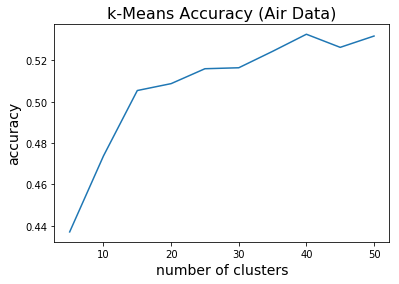

In [296]:
pyplot.title('k-Means Accuracy (Air Data)', fontsize=16)
pyplot.xlabel('number of clusters', fontsize=14)
pyplot.ylabel('accuracy', fontsize=14)
pyplot.plot(range(5, 5*len(air_kmeans_accuracies)+5, 5), np.mean(air_kmeans_accuracies, axis=1))

In [346]:
np.mean(air_kmeans_accuracies[7])

0.5326000000000001

In [249]:
def runGaussianMixtures(xs, ys):
    cv = ShuffleSplit(n_splits=5, train_size=.7, test_size=.3, random_state=0)
    accuracies = []
    for num_clusters in range(5, 51, 5):
        cluster_accuracies = []
        for idxs in cv.split(xs, ys):
            train_data = xs.iloc[idxs[0]]
            train_labels = ys[idxs[0]]
            test_data = xs.iloc[idxs[1]]
            test_labels = ys[idxs[1]]
            mixtures = GaussianMixture(n_components=num_clusters, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(train_data)
            pred_classes, counts = getPredictionClasses(mixtures.predict(train_data), train_labels, num_clusters)
            acc = accuracy_score(test_labels, [pred_classes[p] for p in mixtures.predict(test_data)])
            print "Gaussians: %d, Accuracy %f" % (num_clusters, acc)
            print "Means:"
            print mixtures.means_
            print "Class Counts:"
            print counts
            print "Mixture Classes:"
            print pred_classes
            cluster_accuracies.append(acc)
        print "Average Accuracy for %d Clusters: %f" % (num_clusters, np.mean(cluster_accuracies))
        accuracies.append(cluster_accuracies)
    return accuracies

In [250]:
cab_em_accuracies = runGaussianMixtures(cab_observations_smp, cab_categories_smp)

Gaussians: 5, Accuracy 0.480067
Means:
[[ 1.23730474 -0.12380891  0.07573963 -0.10843251  0.07780752 -0.00440526
   0.07465957 -0.00461469  0.10274977]
 [ 0.03482401  0.02896109 -0.33724365  0.03135276 -0.16597953  0.08444487
   1.51955081  0.09160802 -2.14971763]
 [ 0.31484832  1.33449556 -0.79752377  0.37884124 -0.43580239  0.02908011
   0.00217113  0.0288835   0.08647977]
 [-0.50563722 -0.11407048 -0.24036961  0.35292712 -0.32381209  0.05255156
  -0.24706698  0.05233687 -0.17888224]
 [-0.50563722 -0.10887501  0.11680688 -0.10344295  0.09098776 -0.01200221
   0.01064514 -0.01221072  0.03743363]]
Class Counts:
[[6702, 6419, 3909], [97, 171, 305], [255, 284, 3815], [454, 650, 5251], [17438, 16327, 7923]]
Mixture Classes:
[0, 2, 2, 2, 0]
Gaussians: 5, Accuracy 0.445200
Means:
[[-0.50563722 -0.11141129  0.08274853 -0.08997651  0.07615769 -0.0082239
  -0.00215635 -0.00843321  0.02783666]
 [ 1.25766804 -0.12169773  0.08367138 -0.11162755  0.07285912 -0.00670372
   0.08726744 -0.00691395  0

Gaussians: 10, Accuracy 0.519033
Means:
[[ 1.01615286 -0.13322862  0.04386569 -0.11842788  0.05298696  0.06037927
   0.03009801  0.06016462  0.06016634]
 [ 1.03033946 -0.16986126 -0.10757588  1.3353762  -1.2578257   0.0312998
  -0.44201874  0.03108502 -0.34412756]
 [ 0.05024983  0.05668396 -0.3295412   0.02089974 -0.15762649  0.09946409
   1.51931748  0.1066111  -2.15014833]
 [ 0.25525782 -0.12427878  0.05898423 -0.10373015  0.05102424 -0.00733934
   0.0943435  -0.00754969  0.12367946]
 [-0.50563722 -0.10839418  0.12163445 -0.10187159  0.09649897 -0.01460187
   0.00990728 -0.01481271  0.03417636]
 [ 2.63443617  0.00768572  0.31193403 -0.10627636 -0.05132873 -0.03144236
   0.23604111 -0.03164845  0.26360145]
 [ 2.63584872 -0.20528761 -0.08773396 -0.11450819  0.15211509 -0.01803642
  -0.06967238 -0.0182473  -0.04276307]
 [-0.34097729  1.48414732  0.63843604  0.09156066  0.00723486  0.03686324
   0.25791345  0.03664727  0.33339022]
 [-0.50563722 -0.10827931 -0.13007985  0.10866426 -0.1054

Gaussians: 15, Accuracy 0.633133
Means:
[[ 5.16809552e-01  6.21569797e-01  1.85683782e-01  1.55303826e+00
  -2.94241992e-01  4.60567607e-02 -5.74271922e-01  4.58359211e-02
  -5.11881448e-01]
 [ 3.44314685e-01  1.59196957e+00 -1.97126136e+00  7.52649248e-01
  -1.11676999e+00  4.12058754e-02 -4.80242783e-02  4.10084195e-02
   5.49783481e-02]
 [-5.05637215e-01  2.05550184e-02 -3.93871934e-01  5.87950918e-01
  -7.81560834e-01  9.34348756e-03 -3.27622002e-01  9.13669450e-03
  -2.69745479e-01]
 [ 2.55257822e-01 -1.13351890e-01  9.82321691e-02 -9.33664232e-02
   1.46064408e-01 -2.91061431e-02 -2.40367557e-02 -2.93169499e-02
  -5.62042264e-03]
 [-3.95959046e-01  1.48352969e+00  6.38635209e-01 -3.71682617e-02
   2.09125118e-02  1.42642882e-03  2.58802926e-01  1.20915990e-03
   3.38450045e-01]
 [ 2.63496381e+00 -1.16986667e-01  8.12998448e-02 -1.07300378e-01
   8.28838885e-02 -2.70360257e-02  4.29845751e-02 -2.72498621e-02
   6.78351363e-02]
 [ 2.55257822e-01 -1.39708627e-01  1.18168958e-02 -1.3

Gaussians: 20, Accuracy 0.761233
Means:
[[ 2.83130387e+00 -1.26402062e-01  4.09540156e-02 -1.25180299e-01
   2.21911337e-02  6.64742501e-04  1.58078633e-01  4.47877804e-04
   1.98776941e-01]
 [ 2.11363826e-02  3.85627022e-02 -3.37730711e-01  2.05917054e-02
  -1.96134433e-01  1.25349661e-01  1.51972088e+00  1.31067402e-01
  -2.15094491e+00]
 [ 1.98878583e+00  4.07763076e-01 -6.99251976e-01  6.46878137e-01
  -1.09480554e+00  2.90259100e-02 -5.56285497e-01  2.88065196e-02
  -5.13749415e-01]
 [-5.05637215e-01 -1.18820555e-01  9.45775057e-02 -1.13815068e-01
   6.93873299e-02 -4.87880382e-03 -3.57039408e-02 -5.09544205e-03
  -9.04872524e-03]
 [ 1.01615286e+00 -1.35926126e-01  4.38703033e-02 -1.12412118e-01
   5.96371135e-02  5.58301603e-02  5.01336689e-02  5.56133981e-02
   8.00015320e-02]
 [ 2.55257822e-01 -1.17027995e-01 -8.61321355e-02  1.27251581e-01
  -2.07282350e-01  8.80864084e-02 -4.52043736e-01  8.78627257e-02
  -3.87029716e-01]
 [ 4.65649728e-02  2.66986140e+00 -3.21026357e+00  1.3

Gaussians: 20, Accuracy 0.616867
Means:
[[-5.05637215e-01 -8.05161906e-02 -3.91537615e-01  4.65265580e-01
  -4.52909830e-01  4.06404099e-02 -3.18947612e-01  4.04461662e-02
  -2.55412236e-01]
 [ 2.64058536e+00 -1.33310139e-01  2.06902707e-02 -1.16446008e-01
   5.56226695e-02  1.78791074e-02  9.01342398e-02  1.76615595e-02
   1.33997051e-01]
 [ 5.29474702e-03  2.66909184e+00 -3.21056618e+00  2.78870047e-01
  -5.30255925e-01  3.37252067e-02  1.34532006e-01  3.35143168e-02
   2.43185574e-01]
 [-3.93407949e-03  6.95623189e-02 -3.46438555e-01 -3.08298256e-03
  -2.02030585e-01  8.20508355e-02  1.51957120e+00  8.77720416e-02
  -2.14977900e+00]
 [-5.05637215e-01  1.48352148e+00  6.38447727e-01  1.84562293e-01
  -3.63319288e-02  1.26197738e-02  2.08905966e-01  1.24066900e-02
   2.83401749e-01]
 [-5.05637215e-01 -1.02108572e-01  1.36477651e-01 -9.33430213e-02
   1.15135050e-01 -1.68715482e-02 -2.06689541e-02 -1.70827384e-02
  -1.91879766e-03]
 [ 2.55257822e-01 -1.24396623e-02  2.69858141e-01 -1.1

Gaussians: 25, Accuracy 0.751300
Means:
[[-5.05637215e-01  1.48184217e+00  6.40160736e-01  1.93271791e-01
  -6.20838778e-02  7.51339793e-03  2.41031813e-01  7.29564202e-03
   3.15102866e-01]
 [ 2.55257822e-01 -2.00734645e-01 -9.11533675e-02 -8.10114356e-02
   1.80480898e-01 -4.47858278e-02 -6.43060317e-02 -4.49971318e-02
  -2.71738115e-02]
 [ 2.62413956e+00 -1.26786492e-01  6.39683917e-02 -1.17141566e-01
   4.77890341e-02 -3.59660258e-02  4.41954637e-02 -3.61803029e-02
   7.43340478e-02]
 [-5.05637215e-01  1.57413681e-01  4.92641338e-01  2.12949220e-01
   5.60307200e-01 -1.38767615e-02  7.58731410e-02 -1.40902351e-02
   9.02756746e-02]
 [ 2.55257822e-01 -1.72706035e-02  3.10548233e-01 -2.19348796e-01
  -2.25267723e-01  9.99151022e-02  4.66967403e-01  9.97048138e-02
   5.02073557e-01]
 [ 2.77820730e-02 -1.92620800e-01 -1.98660603e-01 -3.57760256e-03
  -1.66674879e-01  1.04935950e-01  1.52257523e+00  1.10655326e-01
  -2.15177431e+00]
 [ 1.21192057e+00 -1.61919337e-01 -1.43648767e-02 -2.1

Gaussians: 25, Accuracy 0.664333
Means:
[[-5.05637215e-01  4.63271894e-01 -1.04391082e+00  5.07887361e-01
  -9.88533918e-01 -9.91628635e-03 -3.43263638e-01 -1.01178577e-02
  -3.20564549e-01]
 [ 1.66945758e-01  1.48759449e+00  6.35063009e-01 -1.19284752e-01
   4.30133202e-02  4.09671169e-02  2.42291855e-01  4.07467023e-02
   3.29492713e-01]
 [ 2.62726066e+00 -8.24502479e-02  2.01122304e-01 -1.68827629e-01
  -7.75147504e-02  1.24596740e-02 -1.11812539e-01  1.22423071e-02
  -7.29355940e-02]
 [ 1.77522320e-02  2.66884957e+00 -3.21013192e+00  2.14472595e-01
  -4.68741863e-01  3.11816833e-02  1.41142983e-01  3.09712574e-02
   2.52322669e-01]
 [ 1.36449707e+00  1.16791008e-01  1.44990002e-01 -1.06275886e-01
  -1.26056851e-01  5.07300522e-01  1.13125876e-01  5.63259233e-01
  -3.78508396e-01]
 [ 2.55257822e-01 -1.40599659e-01 -4.81156855e-02 -1.67093601e-01
  -4.88507273e-02  3.12088690e-02  5.35568242e-01  3.09915600e-02
   5.73540361e-01]
 [-5.05637215e-01  2.18627531e-02  1.44708539e-01  2.3

Gaussians: 30, Accuracy 0.661800
Means:
[[-5.05637215e-01 -2.20796700e-01  2.22440324e-01 -1.61907613e-01
  -6.49708461e-03 -4.31043803e-02 -5.88556274e-02 -4.33129163e-02
  -3.71263183e-02]
 [ 2.62672840e+00 -2.33284265e-01  2.21426432e-01 -1.26028088e-01
   2.09770193e-01 -6.42000533e-02 -4.25627950e-02 -6.44097836e-02
  -2.11514024e-02]
 [ 2.55257822e-01 -2.88886707e-01 -4.97577891e-01 -1.31493462e-01
   9.35292384e-02 -7.46253936e-02 -4.64067985e-01 -7.48364002e-02
  -4.21196914e-01]
 [-4.44329617e-02  2.67080598e+00 -3.20989787e+00  1.20333240e-01
  -3.88327155e-01  2.75234903e-02  1.77255612e-01  2.74785409e-02
   1.84976761e-01]
 [ 8.70096031e-01  1.66999195e+00 -1.83065286e+00  1.75103089e+00
  -1.37082791e+00  6.32727139e-02 -2.69445034e-01  6.30710940e-02
  -2.37294620e-01]
 [ 2.61791193e+00 -2.56283261e-02  2.92368830e-01 -2.00041769e-01
  -1.84375629e-01 -5.10630827e-02  1.26354645e-01 -5.12752713e-02
   1.56514499e-01]
 [ 9.82981791e-01  8.39993217e-01 -1.50191442e-01 -1.4

Gaussians: 30, Accuracy 0.674033
Means:
[[-5.05637215e-01 -1.90116736e-01 -2.24321547e-01  3.41363694e-01
  -3.90487118e-01  3.26241952e-02 -2.88770210e-01  3.24230434e-02
  -2.17326413e-01]
 [-5.05637215e-01  2.67332389e+00 -3.20969144e+00  3.73994552e-01
  -6.08987919e-01  5.62615406e-02  1.24747151e-01  5.60521484e-02
   2.31738439e-01]
 [-5.05637215e-01 -2.05532672e-01 -6.07432711e-02 -3.20701702e-02
   5.45100259e-02 -9.29925937e-03 -9.35379491e-02 -9.51270061e-03
  -6.85310328e-02]
 [-5.05637215e-01  5.57785277e-02  3.90640087e-01 -2.00380416e-01
  -1.56410882e-01  1.55086382e-02  3.02192662e-01  1.53021672e-02
   3.41198325e-01]
 [ 7.68129757e-01  1.33050769e-01  1.87824368e-01 -3.94195214e-02
  -3.00643916e-03 -1.28202919e-01  2.33254188e-01 -9.87384596e-02
  -5.44667002e-02]
 [-5.05637215e-01 -1.85764155e-01 -2.91030878e-02 -1.05716700e-01
   1.86588068e-01  2.23443481e-02 -1.28395996e-01  2.21266848e-02
  -8.41142689e-02]
 [ 7.57630789e-01  1.48719939e+00  6.35361492e-01 -1.2

Gaussians: 35, Accuracy 0.698267
Means:
[[ 2.40040228e+00  9.79092572e-02 -9.89174302e-01  4.10935881e-01
  -1.37735468e+00 -1.17307834e-01 -6.34465150e-01 -1.17515597e-01
  -5.92876374e-01]
 [-5.05637215e-01  4.50584361e-02  2.48371903e-01 -1.38035525e-01
   1.59063450e-02 -5.00275825e-02  1.31002439e-01 -5.02392035e-02
   1.54705681e-01]
 [ 2.68611430e+00  8.57292497e-02  3.06141927e-01  1.17897793e-01
   3.46915783e-01 -5.52605574e-02  9.24177426e-02 -5.54730006e-02
   1.06621229e-01]
 [ 2.62391865e+00  6.32050416e-02  4.42920356e-01 -1.96233816e-01
  -1.51702888e-01  9.79234089e-02  7.40125508e-02  9.77023477e-02
   1.19274405e-01]
 [-5.05637215e-01 -1.71890121e-01 -7.80359217e-02  1.08878903e-01
   8.61380546e-01  1.15905318e-01 -4.07360516e-01  1.15764192e-01
  -3.46353142e-01]
 [ 2.55257822e-01 -1.34714483e-01 -3.14025128e-01  4.06724801e-01
  -5.43114823e-01  8.54976374e-02 -2.75608674e-01  8.52778401e-02
  -2.06226983e-01]
 [ 1.15321034e+00  2.66482272e+00 -3.20683545e+00 -8.2

Gaussians: 35, Accuracy 0.688833
Means:
[[-5.05637215e-01  1.12599900e-01  4.14301222e-01 -2.10573496e-01
  -1.15648713e-01 -3.27591825e-03  8.53833145e-02 -3.49277636e-03
   1.34431530e-01]
 [-5.05637215e-01  3.14891074e-03  1.85289523e-01 -1.63821202e-01
  -4.99418965e-02 -5.91285871e-02  1.53292899e-01 -5.93408905e-02
   1.75510177e-01]
 [-5.05637215e-01 -2.51197909e-01  4.40044779e-02 -1.21867472e-01
   1.38838366e-01 -2.16822778e-02 -3.21899866e-02 -2.18975801e-02
  -1.19504661e-02]
 [-5.05637215e-01 -1.09721772e-01  7.83926248e-02  1.93296663e+00
  -7.82437877e-01  9.83037844e-02 -3.31034191e-01  9.80787649e-02
  -2.32952845e-01]
 [ 2.64216440e+00 -2.18654582e-01 -1.07382931e-01 -8.27969393e-02
   9.99652452e-02 -4.71095173e-02 -1.07051083e-02 -4.73228114e-02
   1.89917885e-02]
 [ 2.65119260e+00 -8.58565383e-02  1.82771586e-01 -5.93339530e-02
   2.21669199e-01 -6.59356675e-03 -6.04759458e-02 -6.81016951e-03
  -4.54988038e-02]
 [-5.05637215e-01 -2.12639015e-01 -3.07900100e-01 -9.3

Gaussians: 35, Accuracy 0.725833
Means:
[[ 1.21475113e+00  1.36340484e+00 -1.28839899e+00  9.59713946e-01
  -1.15712438e+00  7.20755709e-02  9.08921154e-02  7.18811444e-02
   1.69368237e-01]
 [ 2.55257822e-01 -1.31953680e-01  6.15300147e-02 -8.45806907e-02
   1.58423550e-01 -4.69951125e-02  5.20116884e-01 -4.72081519e-02
   5.44799966e-01]
 [ 2.65870489e+00 -1.70201791e-01 -2.64762337e-01  6.52858803e-01
  -8.95194227e-01  1.86646117e-03 -7.44935571e-01  1.64916413e-03
  -6.75169552e-01]
 [ 1.94567749e+00  3.91161258e-01 -2.97725526e-02  3.47789673e-01
  -1.34028629e-01  3.59484413e-01  4.49492917e-01  4.57044087e-01
  -4.29405997e-01]
 [-5.05637215e-01 -6.19576000e-02  2.10411827e-01 -2.42447375e-03
   3.32075262e-01  7.02680394e-03 -1.46199943e-02  6.80978568e-03
  -3.28736451e-03]
 [ 2.55257822e-01  1.48412189e+00  6.36907659e-01 -1.05922663e-01
   5.85462631e-02 -1.21652808e-02  2.86664036e-01 -1.23814624e-02
   3.73561587e-01]
 [ 2.87420027e-01  1.42560019e-01  2.02657621e-01 -1.8

Gaussians: 40, Accuracy 0.711033
Means:
[[ 2.55257822e-01 -1.52964923e-01  6.41264806e-02  1.19796509e-01
   3.74640421e-01 -1.09368695e-02 -5.87816777e-01 -1.11341188e-02
  -5.41628695e-01]
 [-5.05637215e-01 -1.08640784e-01  1.27528894e-01 -7.47787930e-02
   2.04551540e-01 -3.05051706e-02 -1.76819761e-01 -3.07186712e-02
  -1.59302573e-01]
 [-5.05637215e-01  2.67174139e+00 -3.21213992e+00  4.01224704e-01
  -6.16365689e-01  2.75553181e-02  9.59561665e-02  2.73420955e-02
   2.00888743e-01]
 [ 2.55257822e-01 -3.06733292e-01 -5.45447758e-01 -2.33595862e-01
   5.84293427e-02 -1.18173425e-01  6.47587082e-01 -1.18380746e-01
   6.77021305e-01]
 [ 2.43242929e+00 -1.67792990e-01 -2.21690883e-01  7.37353416e-01
  -8.20535303e-01  1.75281485e-03 -6.26640139e-01  1.53553124e-03
  -5.53873648e-01]
 [ 1.21200361e+00  2.66669634e+00 -3.20401787e+00 -1.29826077e-01
  -6.30816949e-03  9.76947679e-02  2.17396917e-01  9.74698937e-02
   3.42056537e-01]
 [ 2.55257822e-01 -8.26371376e-02 -4.22232991e-01  6.6

Gaussians: 40, Accuracy 0.718800
Means:
[[-5.05637215e-01  1.48373939e+00  6.38712525e-01  1.75545427e-01
  -5.17492446e-02  2.89888330e-02  2.57028326e-01  2.87745576e-02
   3.30889955e-01]
 [ 2.55257822e-01 -1.28272472e-01  1.40164883e-01 -1.27565870e-01
   2.83483655e-02 -5.40585329e-02  2.35664911e-01 -5.42713602e-02
   2.56723790e-01]
 [-5.05637215e-01 -1.87457344e-01  1.33657685e-01 -2.71286334e-01
  -4.54279344e-01  1.32967721e-02 -1.41251524e-02  1.30885761e-02
   2.11435988e-02]
 [-4.35343422e-01 -2.03430343e-01 -2.37615038e-01  2.70985379e-01
  -2.23317225e-01  3.17795600e-01  1.51359648e+00  3.23497945e-01
  -2.14148642e+00]
 [-5.05637215e-01 -2.77834176e-01 -3.13173285e-01 -6.10203192e-02
   2.45748714e-01  7.53275494e-02  1.50024882e-01  7.51077859e-02
   2.02398919e-01]
 [ 2.66460323e+00 -7.46801917e-02 -5.06239022e-01  6.40600936e-01
  -9.93765136e-01 -1.77107902e-02 -6.98205790e-01 -1.79265281e-02
  -6.34663034e-01]
 [ 2.55257822e-01 -7.67199328e-02  1.98402692e-01 -5.1

Gaussians: 45, Accuracy 0.694500
Means:
[[ 1.01615286e+00 -1.45158869e-01  1.44750491e-02 -1.18884544e-01
   5.55068060e-02  1.19205157e-01  1.26374581e-01  1.18995002e-01
   1.71157363e-01]
 [ 2.55257822e-01  6.97973231e-02  2.96303509e-01  2.05708627e-01
   5.13847216e-01 -1.34355796e-01  1.11075434e-01 -1.34562202e-01
   1.26691455e-01]
 [-5.05637215e-01 -2.17286975e-01 -9.54646288e-02 -8.00347886e-02
   1.16345194e-01 -3.65231307e-03 -1.45220427e-01 -3.86915712e-03
  -1.08374009e-01]
 [ 2.22633721e+00 -1.56483719e-01 -2.17178786e-01  7.98339930e-01
  -8.40707316e-01 -5.28285108e-02 -6.64395652e-01 -5.30158821e-02
  -5.93240606e-01]
 [ 2.11854736e+00  3.91347541e-01  1.59785788e-02  4.31283608e-02
  -9.18340279e-02  2.52355541e-01  5.49785053e-01  3.50123743e-01
  -3.24534262e-01]
 [-5.05637215e-01  1.73889233e-01  5.33269870e-01  4.65408689e-02
   1.99221831e-01  2.51960259e-03  5.77530765e-02  2.30296942e-03
   8.27302413e-02]
 [-5.05637215e-01 -1.56597868e-01  7.53838761e-02 -1.1

Gaussians: 45, Accuracy 0.715933
Means:
[[ 2.55257822e-01 -1.00313660e-02  1.22613097e-01 -1.67246137e-01
  -1.91806391e-01 -4.15596314e-02  8.29466079e-01 -4.17728407e-02
   8.42460687e-01]
 [-5.05637215e-01 -1.83253891e-01 -2.46157580e-01 -3.61375651e-03
   3.22089170e-01  3.90444170e-02  5.89476227e-01  3.88306783e-02
   6.22940194e-01]
 [-5.05637215e-01 -1.61793154e-01  4.99035085e-01 -1.53358504e-01
  -5.25590312e-02 -5.97489348e-03  1.15082887e-01 -6.17698147e-03
   1.46778617e-01]
 [-5.05637215e-01  1.48195358e+00  6.40113712e-01  1.12726199e-01
  -1.17173665e-02  6.06429653e-03  2.39344458e-01  5.84665655e-03
   3.13723327e-01]
 [-5.05637215e-01 -2.18907315e-01 -2.81539375e-01  2.03562853e-01
  -3.29400017e-01  5.02190355e-02 -2.82889581e-01  5.00115234e-02
  -2.12395061e-01]
 [ 1.01615286e+00 -1.97225287e-01 -8.01393741e-02 -8.02081006e-02
   2.55989427e-01  4.80386772e-02  7.45540919e-01  4.78226916e-02
   7.62870432e-01]
 [ 1.20459581e+00  2.66422356e+00 -3.20764484e+00 -1.1

Gaussians: 45, Accuracy 0.718300
Means:
[[ 2.55257822e-01 -1.00007149e-01  1.21832051e-01 -2.41814575e-02
   4.13019753e-01  2.55861141e-01 -3.80838869e-01  2.55624859e-01
  -3.12967775e-01]
 [ 1.77704790e+00 -1.31007739e-01  5.44781790e-02 -1.29119900e-01
   2.66167904e-02  9.70204101e-04  9.34987300e-02  7.56249119e-04
   1.21482772e-01]
 [ 2.85615098e+00 -2.26113991e-01  2.33318892e-01 -8.79604459e-02
   3.63083871e-01 -6.30785318e-03 -4.10208204e-01 -6.52446547e-03
  -3.86424854e-01]
 [ 1.56758094e+00 -1.15406131e-01  6.41098559e-02  2.20746187e+00
  -1.62298503e+00  4.26465234e-02 -2.61777085e-01  4.24735768e-02
  -1.54640426e-01]
 [ 1.01615286e+00 -1.21510651e-01  6.30322652e-02  4.95806927e-03
   9.04059041e-02  1.37423310e-01 -4.80585915e-01  1.37195217e-01
  -4.31215583e-01]
 [ 2.88333650e+00 -2.27333584e-01 -1.64566172e-01  7.14518816e-03
   2.56253504e-01 -2.80438596e-02 -7.62030262e-02 -2.82587705e-02
  -3.06543078e-02]
 [-5.05637215e-01 -1.45900354e-01 -5.41415170e-01  5.1

Gaussians: 50, Accuracy 0.663067
Means:
[[-5.05637215e-01 -1.28214024e-02  1.26201115e-01 -1.36430882e-01
   1.58512278e-02 -4.24279520e-02  5.93474195e-02 -4.26412263e-02
   7.63521568e-02]
 [ 3.29883797e+00 -3.29762864e-02  2.76894100e-02 -1.79103937e-01
  -1.49109587e-01  8.34716930e-02  2.25459092e-01  8.32706979e-02
   2.56606028e-01]
 [ 2.55646477e+00 -1.59178013e-01 -8.55014993e-03  4.01269226e-01
   7.30219968e-01 -1.74557758e-01 -1.83411909e-01 -1.74760948e-01
  -1.07951067e-01]
 [ 1.01615286e+00 -1.25517264e-01  6.42059165e-02 -9.34582910e-02
   1.20170295e-01  2.43130011e-02 -3.81939850e-02  2.40940514e-02
  -2.34713278e-03]
 [ 2.55257822e-01  3.21479401e-01 -8.80218613e-01  3.93593526e-01
  -8.81124541e-01  2.37730569e-02 -5.34426783e-01  2.35540021e-02
  -5.02812349e-01]
 [ 2.55257822e-01 -2.03138084e-01  1.61239368e-02 -2.05829749e-01
  -1.11632498e+00  1.31599929e-01  9.35777151e-02  1.31372246e-01
   1.49665745e-01]
 [-5.05637215e-01 -1.97426793e-01 -2.25552732e-01 -3.2

Gaussians: 50, Accuracy 0.717867
Means:
[[ 2.60063225e+00 -6.27234342e-02  2.90381134e-02 -2.42958239e-01
  -2.64528040e-01 -1.10715689e-01  1.04335401e+00 -1.10923812e-01
   1.05475419e+00]
 [ 2.55257822e-01 -1.26379725e-01  6.75095567e-01 -9.26187229e-02
   3.50450462e-01 -6.40516600e-02 -2.87617178e-01 -6.42636458e-02
  -2.57059270e-01]
 [ 2.21101799e+00 -2.28585342e-01 -7.36684639e-01  2.97466982e-02
  -1.95598107e+00 -2.81207233e-01  1.16828310e+00 -2.81401890e-01
   1.21199056e+00]
 [ 2.55257822e-01 -2.32797847e-01 -2.15447466e-01 -1.97812209e-01
   1.35895974e-01  1.77583467e-02  1.02922221e+00  1.75398065e-02
   1.03821864e+00]
 [-5.05637215e-01 -1.38673236e-01  2.72939944e-01 -1.04097891e-01
   7.51852460e-01 -5.61221707e-03  9.55182172e-02 -5.82575116e-03
   1.22911671e-01]
 [ 2.73099485e+00 -1.80165757e-01 -5.16070317e-02  4.68908454e-03
   2.61949867e-01  4.85587423e-02 -7.30570556e-01  4.83377198e-02
  -6.86383442e-01]
 [ 9.59895289e-01  1.39008642e+00 -1.63403551e+00  9.2

Gaussians: 50, Accuracy 0.709433
Means:
[[ 1.77704790e+00 -1.11435811e-01  9.11409653e-02 -1.19198216e-01
   6.39748036e-02 -1.16284959e-02  1.87492942e-02 -1.18430642e-02
   3.70442024e-02]
 [ 2.55257822e-01 -2.73534374e-01 -3.95820416e-01 -5.01837314e-02
   2.27184921e-01  9.58742212e-02 -2.05971428e-01  9.56957875e-02
  -1.53359620e-01]
 [-1.01386262e-01  1.93630342e+00 -1.31513994e+00  8.29757889e-02
  -5.12277866e-01 -1.69614095e-01  1.49481354e+00 -1.63872755e-01
  -2.14077834e+00]
 [ 2.86097675e+00 -1.88873430e-01  7.96389747e-02 -1.15642188e-01
   1.39953116e-01 -4.34009924e-02 -6.63326488e-01 -4.36145079e-02
  -6.31215538e-01]
 [-5.05637215e-01 -1.39424365e-01  2.10805671e-01  3.76797781e-02
   7.57482180e-01  8.61487845e-02 -2.94721951e-01  8.59249836e-02
  -2.32338988e-01]
 [ 2.55257822e-01  8.47599718e-02  4.10237745e-01 -2.11001544e-01
  -3.55000934e-02 -2.74857476e-02  3.67904667e-01 -2.77006375e-02
   4.16331492e-01]
 [ 2.82483336e+00 -2.06742336e-01 -1.69155710e-02 -1.5

Gaussians: 50, Accuracy 0.650533
Means:
[[ 2.55257822e-01 -5.38671431e-02  2.89504337e-01  2.94693834e-01
   1.33554938e+00  1.26573845e-01 -9.54508363e-01  1.26348462e-01
  -8.99749389e-01]
 [ 3.29883797e+00 -1.92848261e-01 -1.80677071e-01 -1.82040878e-01
   3.67640459e-01  7.98489131e-02  9.75036924e-01  7.96595252e-02
   9.96102298e-01]
 [ 2.55257822e-01 -2.08910679e-01  3.10385900e-01 -1.89125181e-01
   1.78229512e-01 -5.74714727e-02 -5.96546283e-02 -5.76832255e-02
  -4.16474412e-02]
 [ 1.77704790e+00 -3.03532619e-01 -5.24630434e-02 -1.48285225e-01
  -5.68181691e-01 -8.66754938e-01  9.34241468e-01 -8.66902749e-01
   9.68351813e-01]
 [-5.05637215e-01  1.48355609e+00  6.38465716e-01  1.85330831e-01
  -3.88479798e-02  1.30345440e-02  2.14597992e-01  1.28214344e-02
   2.89387435e-01]
 [ 7.11036223e-02 -5.24733175e-02  3.04660560e-02  1.67489579e+00
  -2.59887796e+00  6.23764213e-02 -1.82364584e-01  6.21732875e-02
  -6.06678903e-02]
 [ 2.55257822e-01 -2.40369252e-01 -3.82454502e-01 -4.3

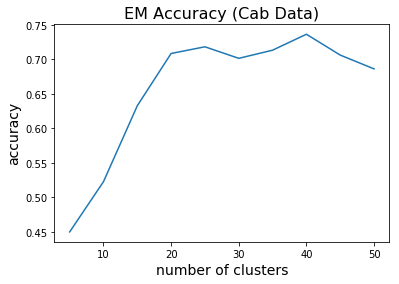

In [297]:
pyplot.title('EM Accuracy (Cab Data)', fontsize=16)
pyplot.xlabel('number of clusters', fontsize=14)
pyplot.ylabel('accuracy', fontsize=14)
pyplot.plot(range(5, 5*len(cab_em_accuracies)+5, 5), np.mean(cab_em_accuracies, axis=1))

In [348]:
np.mean(cab_em_accuracies[3])

0.7085333333333332

In [252]:
air_em_accuracies = runGaussianMixtures(air_observations_smp, air_categories_smp)

Gaussians: 5, Accuracy 0.499000
Means:
[[ 0.32289343 -0.37852361 -0.16414788 -0.317888    0.04743125 -0.24012769
   0.78333472]
 [-0.71109095  0.6102303   0.43120892  1.6402762   0.12089015  0.90756257
  -0.29182028]
 [-0.27855374  1.28102249  1.27529384  0.64299343 -0.34202752 -0.00344325
   0.1007761 ]
 [ 0.43621784 -0.50397251 -0.61026043 -0.7894118   0.63742913  0.01342134
  -0.10969336]
 [-0.45534617 -0.44796854 -0.52271873 -0.00587642 -0.54394347 -0.09868275
  -0.99112741]]
Class Counts:
[[612, 812, 633], [612, 34, 7], [251, 499, 566], [675, 602, 291], [183, 395, 828]]
Mixture Classes:
[1, 0, 2, 0, 2]
Gaussians: 5, Accuracy 0.446667
Means:
[[-0.32869223 -0.48984427 -0.61381616 -0.17115169 -0.31736182 -0.40055371
  -0.93715341]
 [ 0.45309364 -0.53922558 -0.59209117 -0.78192544  0.59081962  0.10913544
  -0.02315446]
 [-0.33017717  1.29354676  1.29847749  0.72436577 -0.38678711 -0.17924358
   0.10400666]
 [-0.24787423  0.40626186  0.24472492  0.75273881  0.0956536   1.26351532
  -0.

Gaussians: 15, Accuracy 0.434667
Means:
[[-0.49717997 -0.44668568 -0.56526389 -0.04111993  0.39743225  0.05272846
  -1.24123764]
 [ 0.0708174  -0.3303101  -0.20261351 -0.26801721 -0.25471614 -0.87843896
   0.44984873]
 [-0.09720605  0.2489076  -0.10096079  0.39138775 -0.31169979  0.0964105
  -1.29563869]
 [-1.96619521  2.02163049  1.25386069  2.76516729 -0.87850761  0.46279648
  -0.66629039]
 [-0.25208856  3.43867047  3.58183392  1.6347003   0.01784406  0.35140338
   0.19924035]
 [ 0.19805169  0.41926157  0.35489075  0.30181755 -0.38095636  0.03695071
  -0.34446537]
 [ 0.42505734 -0.45359385 -0.36102724 -0.66293502  0.73835279 -0.05243528
   0.63345543]
 [ 0.42701094 -0.79137483 -0.73256118 -0.73425344 -0.71662368 -0.10345548
   0.91856642]
 [-1.69634376  2.07823085  2.7686305   1.80582279 -0.52786298 -0.11739853
   0.83996353]
 [ 0.35422648 -0.15124051 -0.27658738 -0.59820179  0.16952907  1.69784794
  -0.30628684]
 [ 0.47814175  0.18094651  0.65624807  0.11796327 -0.44428749 -0.328972

Gaussians: 20, Accuracy 0.498000
Means:
[[-0.52821137 -0.50895896 -0.6031013  -0.16627258  0.37786195 -0.02293922
  -1.23833829]
 [ 0.02156867 -0.47711999 -0.52074152 -0.48401456 -0.28165376  0.01504792
   0.67582705]
 [ 0.3505164   0.35301001  0.87323249  0.24174226 -0.3455225  -0.33123448
   1.55200496]
 [-1.86333093  1.50346414  0.75648546  1.60407918 -0.74845094  0.24172284
  -1.2760124 ]
 [-0.24733093 -0.69115585 -0.34228628 -0.09220018  0.18101337 -0.52869304
   1.60641257]
 [ 0.0833276   0.88876439  0.5129005   0.28822005 -0.02026328  0.26278052
  -0.52545114]
 [ 0.41460705  0.3859807   0.28851513 -0.01855486 -0.27791116 -0.04180254
  -0.3417926 ]
 [ 0.78197425 -0.97084172 -0.67154242 -0.62287197 -0.39626956 -0.44264997
   1.57099359]
 [-1.57074673  1.81819463  1.41609201  1.65329866 -1.39715571  0.34386494
  -0.29849143]
 [-1.1379425   0.91092955  1.32147451  0.75850773  0.19643151 -0.12035557
   0.66805242]
 [ 0.26343177  0.88410132  1.05402979  0.16924802 -0.52201299  0.01766

Gaussians: 20, Accuracy 0.535333
Means:
[[-0.16654925  0.81877656  1.05604007  0.31527549 -0.4234702  -0.0103124
   0.6097449 ]
 [-1.30877192  2.59214219  1.57559502  1.37565294 -0.8662682   0.29358452
  -0.80369784]
 [-0.80790106 -0.24629958 -0.390465    0.32721134 -0.46251641 -0.00943377
  -1.25852082]
 [ 0.00862394  3.88697259  4.54412578  1.05906635  0.09091921  0.01633114
   0.96681849]
 [ 0.63556884 -0.24260024 -0.20943929 -0.84053559  0.39945     1.69784794
   0.63481645]
 [ 0.40873782 -0.62699359 -0.55285345 -0.81734472 -0.22728208 -1.46329354
   0.15896078]
 [ 0.34835104 -0.39180066 -0.56532006 -0.46946195  0.69548006 -0.01002128
  -1.27090148]
 [ 1.90175313  1.07991861  0.53158251 -0.5891986   1.41962586 -0.34409845
  -0.70228089]
 [ 0.344239    0.02666554 -0.0765372  -0.29343258  0.60271608 -0.03247448
  -0.31373569]
 [-0.10668204 -0.40463318 -0.40852179 -0.34983009 -0.18632999 -0.07245004
   0.67331605]
 [ 0.29394345 -0.09814858 -0.31391301 -0.53193479  0.1816463   1.697847

Gaussians: 25, Accuracy 0.471333
Means:
[[-2.72205874e-01 -1.46299128e-01 -2.44035891e-01 -3.56816877e-02
   2.66757768e-02 -1.59849797e-01 -2.86914863e-01]
 [ 2.12103844e-01  4.47135465e-01  3.76358057e-01  1.84975154e-01
  -5.51490345e-01  1.60051311e-02 -3.47618416e-01]
 [ 7.22838124e-01 -1.70110229e-01 -6.73833564e-01 -7.78757441e-01
  -3.33064232e-01  1.49928094e+00 -7.03356980e-02]
 [-3.80481084e-01  3.02890493e+00  2.43263103e+00  8.76642527e-01
   1.63811608e-02  3.63309297e-01 -5.49197175e-01]
 [ 4.25530107e-01 -1.23380475e-01 -2.53156854e-01 -6.09698455e-01
   2.00597993e-01  1.69784794e+00 -2.72408689e-01]
 [ 2.89224538e-01  1.66144840e+00  1.61942880e+00  5.66823747e-02
   2.08318757e-01 -8.50507680e-01 -1.08280144e+00]
 [ 1.79470642e-01 -5.56886467e-01 -1.80541687e-01 -1.65691254e-01
  -1.24221634e-01  1.17277200e-01  1.58300856e+00]
 [ 8.97591421e-01 -5.53794859e-01 -1.65302197e-01 -4.05259468e-01
  -1.28705892e-01 -6.52583188e-01  1.55689591e+00]
 [-7.63342989e-02 -8.132

Gaussians: 30, Accuracy 0.512333
Means:
[[ 0.44899493  0.56363233  1.11221096  0.29093051 -0.47723119 -0.24383492
   1.55102933]
 [ 0.35193613 -0.68554014 -0.60177175 -0.8187548  -0.20285453 -1.46329354
   0.16900586]
 [ 0.1726759  -0.48709426 -0.42509687 -0.38063114 -0.15780691 -1.06815085
   0.21404276]
 [ 0.09404782 -0.57158138 -0.67588882 -0.59917674  0.9410387  -0.17888683
  -1.25951082]
 [ 0.30557035 -0.55364542 -0.38940536 -0.68444981  0.80375728 -0.10491002
   0.63345792]
 [ 1.1199652   4.26134522  4.68149303  0.83295936  0.11374028 -0.13496747
   0.32847191]
 [ 0.39403902 -0.48905051 -0.54652311 -0.59426809 -0.43612831 -0.07726315
   0.65962887]
 [-0.0321451   0.46474884  0.05055297  0.25730939 -0.29022339 -0.12259592
  -1.2953766 ]
 [-1.4689941   2.71864539  1.06258465  1.85010213 -0.79626849  1.27245912
  -1.3009408 ]
 [-0.57208324 -0.54951241 -0.45303842  0.17320106 -1.29386101 -0.08241706
   0.79768552]
 [-0.22360652 -0.18414021 -0.2933535  -0.18526951  0.56259866 -0.12116

Gaussians: 30, Accuracy 0.510000
Means:
[[-0.3057904  -0.26656851 -0.37160849 -0.03108786 -0.0350354  -0.31703052
  -0.28537836]
 [-0.33584675  2.12302384  1.0327875   0.45562633 -0.25187956  0.11890735
  -1.29285054]
 [ 0.11796103 -0.5670537  -0.68367162 -0.59153499  0.90252164 -0.05098712
  -1.26372617]
 [ 0.04857956  0.45069617 -0.41867682 -0.38794948 -1.14585471  0.1141631
   0.02631449]
 [-0.1044203   0.1497269  -0.02271689  0.13107727  0.18194551  1.30270525
  -0.3622184 ]
 [ 0.26628698  0.49250484  0.4683387   0.1328996  -0.45231174 -0.34204205
  -0.34346888]
 [ 0.40196895  3.74672916  3.64943535  0.74218888 -0.39161932 -0.30600403
   0.10319974]
 [-0.13062589 -0.42077809 -0.41037535 -0.3013411  -0.29611092 -0.27837907
   0.67511148]
 [-2.29073293  2.36932822  1.6882194   2.7574017  -1.47631208 -0.02329517
  -0.49062675]
 [ 0.35310677 -0.7099272  -0.63588259 -0.84951719 -0.19472888 -1.46329354
   0.1338509 ]
 [-1.48228101  0.51139379  0.86336013  1.02506712 -0.8435702  -1.208074

Gaussians: 35, Accuracy 0.509667
Means:
[[-3.46117945e-01  1.16333796e+00  1.78595136e+00  8.06394317e-01
  -7.14535878e-01 -3.18916671e-01  1.54373678e+00]
 [ 6.37769895e-01 -3.75022858e-01 -3.21051784e-01 -6.78153437e-01
   7.05311279e-01  1.09214195e-01  6.25881421e-01]
 [ 8.54473924e-01 -6.48530381e-01 -2.71242266e-01 -3.97238403e-01
  -1.15624596e-01 -4.13214037e-01  1.55657829e+00]
 [-1.38825323e+00 -7.99595924e-01 -2.49573408e-01  9.66821099e-01
  -3.82689810e-01 -8.53132128e-01  1.27471702e+00]
 [ 2.01134761e+00  3.38503347e-01  7.64800276e-01 -5.46573857e-01
   8.09198064e-01 -4.81580761e-01  1.57044500e+00]
 [-7.43738921e-01 -1.52244940e-01 -2.95465141e-01 -5.51450503e-02
  -1.42097711e+00 -3.26264624e-01  3.67344051e-01]
 [-1.54497852e+00  7.59621647e-01  4.66718597e-01  1.47743184e+00
  -1.67959261e+00  8.59164679e-02 -2.67682677e-01]
 [-1.58283836e-01  2.37614895e+00  2.08880650e+00  9.07104547e-02
   3.76089776e-01 -2.76689386e-01 -3.82632887e-01]
 [-6.40184741e-02  4.625

Gaussians: 35, Accuracy 0.488333
Means:
[[-6.16209635e-01 -5.33290840e-01 -5.68146448e-01 -1.25580803e-01
   2.80315101e-01 -6.75922646e-01 -1.23767779e+00]
 [-9.29793423e-02 -6.90913673e-01 -3.97507935e-01  1.61247106e-02
  -4.31751858e-01 -6.89504255e-01  1.58950439e+00]
 [ 3.60502488e-01 -7.10071493e-01 -6.30904776e-01 -8.55968066e-01
  -2.00458157e-01 -1.46329354e+00  1.53411065e-01]
 [ 3.88289155e-01 -1.12278427e-01 -3.37810039e-01 -5.48301328e-01
   6.44398970e-01 -7.66301557e-01 -3.20681082e-01]
 [ 2.71645066e-01 -5.83625939e-01 -3.98999085e-01 -6.82874815e-01
   7.58095909e-01 -6.89490956e-01  6.35895673e-01]
 [-1.19265614e+00  1.05035288e+00  1.49112085e+00  8.79436481e-01
   1.40667226e-01 -4.60940575e-01  6.69195293e-01]
 [-1.05573935e-01  2.64262222e+00  1.64594707e+00  2.35819072e-01
  -7.57383377e-01 -9.73958294e-01 -9.56259059e-01]
 [ 2.37209067e-01 -2.97418225e-01 -3.88034386e-01 -1.20609056e-01
  -1.86119882e-01 -6.88851230e-01 -1.29162937e+00]
 [ 7.02494271e-02 -5.274

Gaussians: 40, Accuracy 0.518000
Means:
[[ 0.49211751  1.84486027  2.17832251  0.36512213 -0.15542887  0.06927579
   0.60248987]
 [ 1.02216549 -0.4954772  -0.01814503 -0.30073146  0.13167125 -0.27827438
   1.56787608]
 [ 0.96347254  0.34859448  0.36949268 -0.61562657  1.63797835 -0.42604401
  -1.26709373]
 [ 1.04663715  0.38522995  0.64316384 -0.3301443   1.40985527 -0.50332257
  -0.0422783 ]
 [ 0.62101759 -1.05196298 -0.83001133 -0.79773447 -0.83442211 -0.67300817
   1.20887847]
 [ 0.01376175  3.37837256  2.49974634  0.50188577 -0.6756268  -1.1188327
   0.2370893 ]
 [ 0.10466272  0.12638856 -0.15167543  0.06862399 -0.24572206 -0.15290479
  -1.29391801]
 [-2.10176407  1.88963222  1.28536389  2.51743064 -1.87265478  0.50692963
  -0.29320535]
 [ 1.43476019 -0.44467225 -0.44548575 -0.85818838 -0.01797797 -0.01521526
   0.61000645]
 [ 0.78542874  0.24512421  0.20963939 -0.31861035  0.51826632 -0.1352198
  -0.32851473]
 [ 0.10078819 -0.49674721 -0.55257469 -0.53870679 -0.56896206  0.4122714

Gaussians: 40, Accuracy 0.502333
Means:
[[ 0.51622745 -0.0773737  -0.60904207 -0.45269447 -0.87355358 -1.06815085
  -0.13398023]
 [ 0.23051044 -0.06611559 -0.48253328 -0.41584894  0.52266735  0.90145771
  -0.11992539]
 [-0.18295259  2.43338398  2.16979207  1.28488659  0.06772169  1.37768825
  -0.52596666]
 [ 0.06050524 -0.41423113 -0.37769257 -0.52884123  0.20096458  0.13674011
   0.66663014]
 [-0.48309708 -0.52564027 -0.62906247 -0.25739577  0.47492301 -0.01888893
  -1.23920036]
 [-1.28043244  1.16134015  1.56605766  0.8768445   0.12259379 -0.03873741
   0.67145461]
 [-1.31113832  0.70776395  1.33548215  1.33765476 -1.50515514 -0.47634231
   1.56608512]
 [-0.11332191 -0.80540818 -0.63821309 -0.2450484  -1.94351343 -0.77782364
  -0.23991427]
 [ 1.85739384  1.49258989  1.23472619 -0.48089294  0.56693088 -0.17761131
  -0.32778195]
 [ 1.78697224  0.56538965  0.96334866 -0.34479903  1.52189956 -0.14605832
   0.91505155]
 [ 0.40056146  0.36732835  0.26797215 -0.14658491 -0.32764048  1.69784

Gaussians: 40, Accuracy 0.521000
Means:
[[-8.94410226e-01  4.65892288e-01  9.92671212e-01  8.30803032e-01
  -1.57200063e-01 -3.00228508e-01  1.58105340e+00]
 [ 7.24447940e-01 -6.22350348e-01 -1.54522380e-01 -3.66884694e-01
   3.75925087e-01 -4.19550174e-01  1.57330178e+00]
 [-1.40955724e+00  7.53461869e-01  1.38180417e+00  1.44102517e+00
  -1.53490326e+00 -4.20456857e-01  1.55946463e+00]
 [ 1.80165259e-01  2.05280076e-01  2.47290711e-01 -1.08734937e-01
   3.34873496e-01  1.30270525e+00  6.28340473e-01]
 [-1.30053187e-01 -2.44916203e-01 -1.60137007e-01 -2.48458843e-01
  -2.03455113e-02 -2.70993590e-01  6.70307792e-01]
 [ 7.12479629e-02 -7.16335825e-01 -5.62051264e-01 -9.07269142e-01
   8.27070234e-01  9.86583327e-01  4.42843307e-01]
 [ 4.63239912e-01 -9.46520838e-01 -8.16074739e-01 -8.69692643e-01
  -9.50385561e-01 -9.37837873e-01  6.83569664e-01]
 [-1.46497627e+00  5.85154921e-01  2.49403986e-01  1.38568033e+00
  -1.70851639e+00  9.54938654e-02 -2.67160956e-01]
 [-6.39517455e-01  5.031

Gaussians: 45, Accuracy 0.499333
Means:
[[-2.56893720e-02  1.04011947e+00  1.24306851e+00  3.28269867e-01
  -6.67218132e-01  6.08298200e-02  5.92504940e-01]
 [ 7.79076405e-01  1.01838760e+00  1.34469141e+00  2.04100438e-01
   1.03631000e+00 -2.78672546e-01  3.04056872e-03]
 [ 1.79549831e+00 -8.50827489e-02  2.82453853e-01 -4.93693679e-01
   8.45243184e-01 -7.41156808e-01  1.03317322e+00]
 [-4.20567628e-01 -3.83274456e-01 -5.63010172e-01 -2.08577231e-01
  -7.77752445e-01 -8.15775464e-01  6.63040029e-01]
 [ 6.48805375e-01 -4.08101882e-01 -6.69603723e-01 -5.66010383e-01
  -8.24352919e-01 -9.00775033e-01 -3.22162716e-01]
 [ 1.11373065e+00  1.46787285e-01  1.43080748e-01 -5.26828222e-01
   6.30746468e-01  6.83951998e-02  6.19213025e-01]
 [-7.78677386e-01 -1.93826345e-02 -5.26331764e-02  7.37751841e-01
  -1.52656293e+00 -3.11358400e-01 -3.64202046e-01]
 [-6.17669014e-01  6.99767948e-01 -1.40623764e-01  1.53010466e-01
  -7.26268331e-01  3.42997398e-01  3.67040753e-01]
 [-9.98107212e-02  4.128

Gaussians: 45, Accuracy 0.500667
Means:
[[ 1.32975421e-01  2.09557392e-01  6.58059496e-02 -3.88492812e-01
   1.27141572e-01  4.45321826e-01 -4.47617353e-01]
 [-1.93856822e+00  6.58563164e-01  7.00041321e-01  2.19814516e+00
  -9.96378149e-01 -2.04841876e-01 -1.15919431e+00]
 [ 7.21299466e-01  1.05588857e-01  7.00699150e-02 -3.51616613e-01
   4.58989853e-01 -2.84447958e-01 -3.27571079e-01]
 [-4.88409973e-01 -2.62749476e-01 -3.57532774e-01  3.11163820e-01
  -8.90633782e-01 -2.40204548e-01 -2.74111878e-01]
 [ 2.41352111e-01 -6.24817709e-01 -7.21724981e-01 -5.85254336e-01
   4.82523236e-01 -3.21217589e-01 -1.27360983e+00]
 [-2.66994930e-01 -1.73965633e-01 -9.29101110e-02 -9.46197751e-02
  -1.06722765e-01 -2.96222644e-01  6.72448555e-01]
 [-9.65969722e-02 -3.61440360e-01 -5.22855562e-01 -4.09756729e-01
   7.59669271e-01 -3.69778405e-01 -2.97525978e-01]
 [ 1.37930963e-01  2.92735313e+00  3.28229310e+00  9.59395109e-01
   2.66052193e-02  1.14651059e-01  6.01278566e-01]
 [ 3.86184348e-01 -1.531

Gaussians: 50, Accuracy 0.538000
Means:
[[-6.29450572e-01 -9.98801741e-02 -2.31394407e-01  3.93706225e-01
  -6.73576959e-01 -2.78769285e-01 -2.76649680e-01]
 [-2.66102771e-01 -2.91622294e-01 -1.62283901e-01 -2.70247574e-01
   5.64701771e-01 -3.25140283e-01  6.58853414e-01]
 [ 1.41300843e-01  3.81863258e-01  4.66299582e-01 -1.61439291e-02
   3.77744540e-01  1.30270525e+00  6.24962552e-01]
 [ 8.00478566e-01 -5.52871546e-01 -1.52378398e-01 -3.00249050e-01
  -1.16023653e-01 -3.49591786e-01  1.55652904e+00]
 [-1.59521995e+00  1.41578611e+00  6.87689665e-01  2.11615568e+00
  -2.06178178e+00 -1.24263914e-01 -4.51784733e-01]
 [ 5.54780782e-01 -5.77878605e-01 -4.88613293e-01 -7.65689617e-01
   6.48786691e-01 -3.18934409e-01  6.29147328e-01]
 [ 7.17999878e-01 -2.13467930e-01 -3.73850758e-01 -8.38726487e-01
   6.07963275e-01  1.69784794e+00 -2.30583933e-01]
 [ 2.86521734e-01 -4.67544793e-01 -2.60535141e-01 -3.35932157e-01
   4.53486818e-01 -1.08183222e-01  3.97847338e-01]
 [ 2.91527609e-01 -6.090

Gaussians: 50, Accuracy 0.525000
Means:
[[-8.19832457e-01  1.16833893e+00  4.94042559e-01  8.55716071e-01
  -7.87678257e-01  1.44407432e-01 -1.30344084e+00]
 [ 1.07994314e-01 -4.18834438e-02 -4.28269931e-02 -5.85802875e-02
  -8.79613198e-01 -8.48616950e-02  5.84692075e-01]
 [-2.29281866e+00  1.66028766e+00  2.56059249e+00  2.91438199e+00
  -1.45331983e+00 -2.83922355e-01  1.37356451e+00]
 [ 4.28214246e-01 -3.23449897e-01 -5.29687798e-01 -7.47765135e-01
  -3.26365663e-01 -1.46329354e+00 -3.16705627e-01]
 [-7.92235054e-01 -6.64898654e-02 -1.40483570e-01  7.19697634e-01
  -1.49866955e+00  6.24577670e-02 -3.31025523e-01]
 [ 5.16126114e-01 -9.93130378e-01 -7.18604146e-01 -6.91992144e-01
  -3.71634728e-01 -6.60580882e-01  1.57843788e+00]
 [-3.15097203e-01 -6.15458189e-01 -2.85787408e-01 -1.08585365e-02
  -1.85121623e-01 -7.23000088e-01  1.61420548e+00]
 [-1.23958660e+00  8.62174315e-01 -1.46163068e-02  4.72551562e-01
  -2.74111363e-02  2.61208912e-01 -1.01392525e+00]
 [-1.90726664e-01 -6.358

Gaussians: 50, Accuracy 0.532667
Means:
[[-7.26167662e-02 -1.12310394e-01 -2.61428566e-01 -2.45915867e-01
   6.34935060e-01  4.77300217e-01 -2.93577525e-01]
 [-1.19352301e+00  9.46776273e-01  1.47041395e+00  1.02031686e+00
  -2.85577774e-01  2.69177833e-01  1.11116819e+00]
 [ 1.48848627e+00  2.32136886e+00  1.79649743e+00 -3.17051785e-02
   6.28645838e-01  9.55801458e-01  1.52287292e-01]
 [ 4.27023184e-01 -3.40343607e-01 -3.51415368e-02 -4.62388635e-01
   2.26841699e-01 -7.61327263e-01  6.26687559e-01]
 [-5.38259380e-01  6.93639540e-02 -3.96680558e-02  1.16218479e+00
   3.97310468e-01  9.07562570e-01 -2.41933106e-01]
 [ 2.57824121e-01  1.53308101e+00  2.20008899e+00  4.77386703e-01
  -2.82015640e-01 -2.92879996e-01  1.54954397e+00]
 [-6.30861609e-01  8.67538573e-01  1.22210291e+00  4.92172080e-01
  -5.41883405e-01 -1.21639110e+00 -5.37839986e-02]
 [ 9.46379759e-01  1.79714244e+00  2.15856959e+00  1.72629530e-01
  -1.12430641e-01 -8.31064525e-01  2.26343054e-01]
 [-1.22329310e+00  2.228

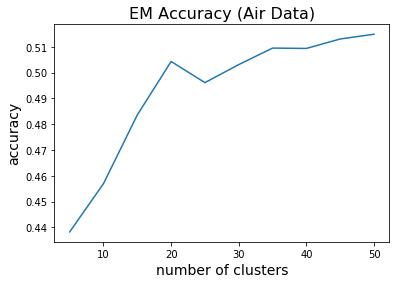

In [298]:
pyplot.title('EM Accuracy (Air Data)', fontsize=16)
pyplot.xlabel('number of clusters', fontsize=14)
pyplot.ylabel('accuracy', fontsize=14)
pyplot.plot(range(5, 5*len(air_em_accuracies)+5, 5), np.mean(air_em_accuracies, axis=1))

In [349]:
np.mean(air_em_accuracies[3])

0.5043333333333333

In [289]:
KM_CLUSTER_COUNT = 40
EM_CLUSTER_COUNT = 20

In [167]:
################################
### Dimensionality Reduction ###
################################

In [19]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE

In [169]:
pca_cab = PCA(n_components=None, copy=True, whiten=False, svd_solver="full", tol=0.0, iterated_power="auto", random_state=None).fit(cab_observations_smp)

In [170]:
pca_cab.explained_variance_ratio_

array([2.72058346e-01, 2.61670753e-01, 1.69506911e-01, 1.34951338e-01,
       7.01441864e-02, 5.47697186e-02, 2.78092186e-02, 9.08619911e-03,
       3.32915170e-06])

In [171]:
pca_cab.components_

array([[-7.44750475e-03,  2.11137433e-03, -7.27447989e-03,
         6.64363984e-03, -5.67576592e-03,  6.92595934e-01,
        -1.42082454e-01,  6.92587102e-01, -1.42328355e-01],
       [-8.00942700e-03, -9.46132882e-03, -2.44125957e-02,
         1.48200911e-02, -3.25990190e-02, -1.42437627e-01,
        -6.91853156e-01, -1.42404693e-01, -6.91910155e-01],
       [ 6.10419680e-03, -2.01802833e-02, -5.87493309e-01,
        -5.43985297e-02, -8.06080252e-01, -1.54390313e-04,
         3.13425830e-02, -1.05632623e-04,  2.64601995e-02],
       [ 9.99865378e-01,  9.65201805e-03,  1.16162243e-03,
         4.29840303e-03,  5.70685379e-03,  3.97528622e-03,
        -6.60553374e-03,  3.97999883e-03, -6.95654551e-03],
       [ 5.05051109e-03, -2.81094788e-01,  7.79234010e-01,
        -1.28427008e-02, -5.59957170e-01,  2.49124138e-03,
        -2.81067816e-03,  2.42479499e-03,  4.19722985e-03],
       [ 8.47732690e-03, -6.36484171e-01, -1.27758187e-01,
        -7.43746751e-01,  1.58880313e-01,  3.371776

In [172]:
pca_air = PCA(n_components=None, copy=True, whiten=False, svd_solver="full", tol=0.0, iterated_power="auto", random_state=None).fit(air_observations_smp)

In [173]:
pca_air.explained_variance_ratio_

array([0.39997714, 0.19482541, 0.17910144, 0.10268786, 0.08603573,
       0.0289285 , 0.00844392])

In [174]:
pca_air.components_

array([[-0.37868227,  0.50559265,  0.48291343,  0.53609887, -0.20939385,
         0.18164018, -0.0594096 ],
       [ 0.50940379,  0.36068417,  0.42484674, -0.17659272,  0.50593578,
         0.1468428 ,  0.34813954],
       [ 0.02144368, -0.01213839,  0.1662152 ,  0.00414642, -0.40503182,
        -0.63434046,  0.63663926],
       [ 0.12853154,  0.2729072 ,  0.16614438, -0.10732364,  0.12919327,
        -0.67420226, -0.63137897],
       [ 0.54188081,  0.15418025,  0.06101278, -0.21395386, -0.71605979,
         0.27529391, -0.21110772],
       [ 0.53477577, -0.17757408, -0.20055154,  0.7899713 ,  0.08104093,
        -0.10451315, -0.02676025],
       [-0.02252561,  0.6959549 , -0.69794337, -0.00682204,  0.01150046,
        -0.04240037,  0.16136245]])

In [175]:
ica_cab = FastICA(n_components=None, algorithm="parallel", whiten=True, fun="logcosh", fun_args={"alpha" : 1.0}, max_iter=200, tol=1e-4, w_init=None, random_state=None).fit(cab_observations_smp)

In [176]:
ica_cab.components_

array([[-3.17064315e-03,  1.02165968e-05, -4.20825309e-05,
         2.15602275e-05, -4.68069193e-06,  1.66910391e-04,
         5.99099672e-05, -1.60738305e-04,  2.46097523e-05],
       [-1.94930198e-05,  3.55255317e-05,  6.46884218e-06,
         1.34185674e-05,  4.56350857e-06, -4.65449941e-03,
         1.58507499e-05,  1.49312999e-03, -2.71710633e-05],
       [-3.67240310e-05,  3.13890819e-03,  2.76161676e-03,
         2.31299779e-04,  5.65546136e-04, -2.07760464e-03,
         2.23795982e-04,  2.08893984e-03, -1.39544869e-04],
       [-7.25416660e-06,  6.22368883e-04, -2.06810662e-04,
        -5.18653597e-03,  1.52835427e-03,  8.50821909e-04,
         1.94142584e-04, -8.41186499e-04, -2.30913217e-04],
       [-2.93563536e-06, -7.72488922e-05,  2.77225050e-05,
        -4.74962841e-05,  4.69651041e-05, -6.88421122e-02,
        -8.78506814e-03,  6.88378121e-02,  8.87242187e-03],
       [-5.06083924e-07,  4.59214076e-03, -2.05871046e-03,
        -5.23663962e-04,  3.34572022e-04, -1.173275

In [177]:
ica_cab.mixing_

array([[-3.15192671e+02, -6.03061835e-01, -2.07623758e+00,
        -1.21226789e+00, -5.69343814e-01,  2.92386891e+00,
         8.32166161e+00,  3.41344638e-02,  7.65099732e-03],
       [-1.16493573e+00, -1.70460382e-01,  9.15506969e+01,
        -2.26349745e+01, -2.47570020e+00,  1.47301713e+02,
        -3.40010456e+00, -2.13133890e+01,  5.80442053e-01],
       [-2.75543561e+00,  1.31688773e+00,  2.18448926e+02,
         1.09288682e+01,  8.91922457e+00, -1.64838631e+02,
        -6.11989154e+00, -2.74379635e+01,  2.09493871e+00],
       [-6.53514339e-02, -4.76348070e-01,  5.20987562e+01,
        -1.56421366e+02, -3.15115117e+00,  1.82500470e+01,
        -1.41602606e+00,  6.56449986e+01, -2.08428703e-01],
       [-1.50369916e+00,  6.15537019e-01,  1.69339754e+02,
         1.34143733e+02,  7.53099198e+00, -1.99740396e+01,
         2.81567341e+00,  2.27279946e+02,  5.74072182e-01],
       [ 1.90101211e+00, -3.16306067e+02,  1.90340624e+00,
        -7.18419249e-01, -8.90329231e-01,  1.321439

In [178]:
grp_cab = GaussianRandomProjection(n_components=6, random_state=None).fit(cab_observations_smp)

In [179]:
grp_cab.components_

array([[ 0.53258331, -0.68711294,  0.37943149,  0.00333381,  0.78912537,
        -0.79008862,  0.27882798,  0.00253285, -0.26493959],
       [-0.08762595, -0.49646031,  0.4470588 ,  0.15677289, -0.49788028,
         0.41551794, -0.55207941,  0.68300025, -0.22054915],
       [-0.00343726,  0.50953127,  0.34266459, -0.26679356, -1.0909247 ,
         0.24266333,  0.05146452, -0.34382332,  0.95709303],
       [ 0.12580703, -0.45178564, -0.2942471 , -0.50690148, -0.29384805,
         0.63956597, -0.24888407, -0.62664367, -0.19444026],
       [ 0.24441767, -0.61679145, -0.45408755,  0.06971109,  0.09187056,
        -0.09512962, -0.53104975, -0.10471564, -0.19037553],
       [-0.472058  ,  0.19834059,  0.41060108, -0.18229235,  0.61920078,
         0.27319094, -0.13440702,  0.04563164,  0.08762278]])

In [180]:
grp_air = GaussianRandomProjection(n_components=6, random_state=None).fit(air_observations_smp)

In [181]:
grp_air.components_

array([[-0.07771137, -0.29997784, -0.65259507,  0.26472339,  0.18357648,
        -0.24197425, -0.69877565],
       [ 0.71234965,  0.42231699, -0.57008554,  0.81350948, -0.32187038,
         0.08682354, -0.10808935],
       [-0.17429189,  0.26486327, -0.31722573, -0.02219522,  0.36189672,
         0.66804516, -0.57528544],
       [-0.48000154, -0.17891411, -0.42372855,  0.35372737, -0.81168231,
        -0.16945246, -0.07970098],
       [ 0.3003385 ,  0.58177345,  0.60176301,  0.12079883,  0.13792756,
         0.6408475 , -0.14298503],
       [ 0.28656498, -0.05687236, -0.34763657, -0.01411182,  0.23858489,
         0.02804453, -0.35029206]])

In [182]:
### Dimensionality Reduction Visualizations ###

In [16]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [17]:
colors = ['green', 'yellow', 'red']

In [36]:
pca_cab_2d = PCA(n_components=2, copy=True, whiten=False, svd_solver="full", tol=0.0, iterated_power="auto", random_state=None).fit(cab_observations_smp)

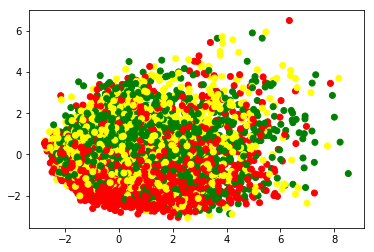

In [39]:
pca_cab_3d = PCA(n_components=3, copy=True, whiten=False, svd_solver="full", tol=0.0, iterated_power="auto", random_state=None).fit(cab_observations_smp)

In [44]:
ica_cab_2d = FastICA(n_components=2, algorithm="parallel", whiten=True, fun="logcosh", fun_args={"alpha" : 1.0}, max_iter=200, tol=1e-4, w_init=None, random_state=None).fit(cab_observations_smp)

/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/scipy/linalg/basic.py:1321: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  x, resids, rank, s = lstsq(a, b, cond=cond, check_finite=False)


In [48]:
ica_cab_3d = FastICA(n_components=3, algorithm="parallel", whiten=True, fun="logcosh", fun_args={"alpha" : 1.0}, max_iter=200, tol=1e-4, w_init=None, random_state=None).fit(cab_observations_smp)

In [52]:
grp_cab_2d = GaussianRandomProjection(n_components=2, random_state=None).fit(cab_observations_smp)

grp_cab_3d = GaussianRandomProjection(n_components=3, random_state=None).fit(cab_observations_smp)

In [ ]:
from core import Parametric_tSNE

In [60]:
high_dims = cab_observations_smp.shape[1]
num_outputs = 2
perplexity = 30
tSNE_cab_2d = Parametric_tSNE(high_dims, num_outputs, [perplexity])
tSNE_cab_2d.fit(np.array(cab_observations_smp))

high_dims = cab_observations_smp.shape[1]
num_outputs = 3
perplexity = 30
tSNE_cab_3d = Parametric_tSNE(high_dims, num_outputs, [perplexity])
tSNE_cab_3d.fit(np.array(cab_observations_smp))

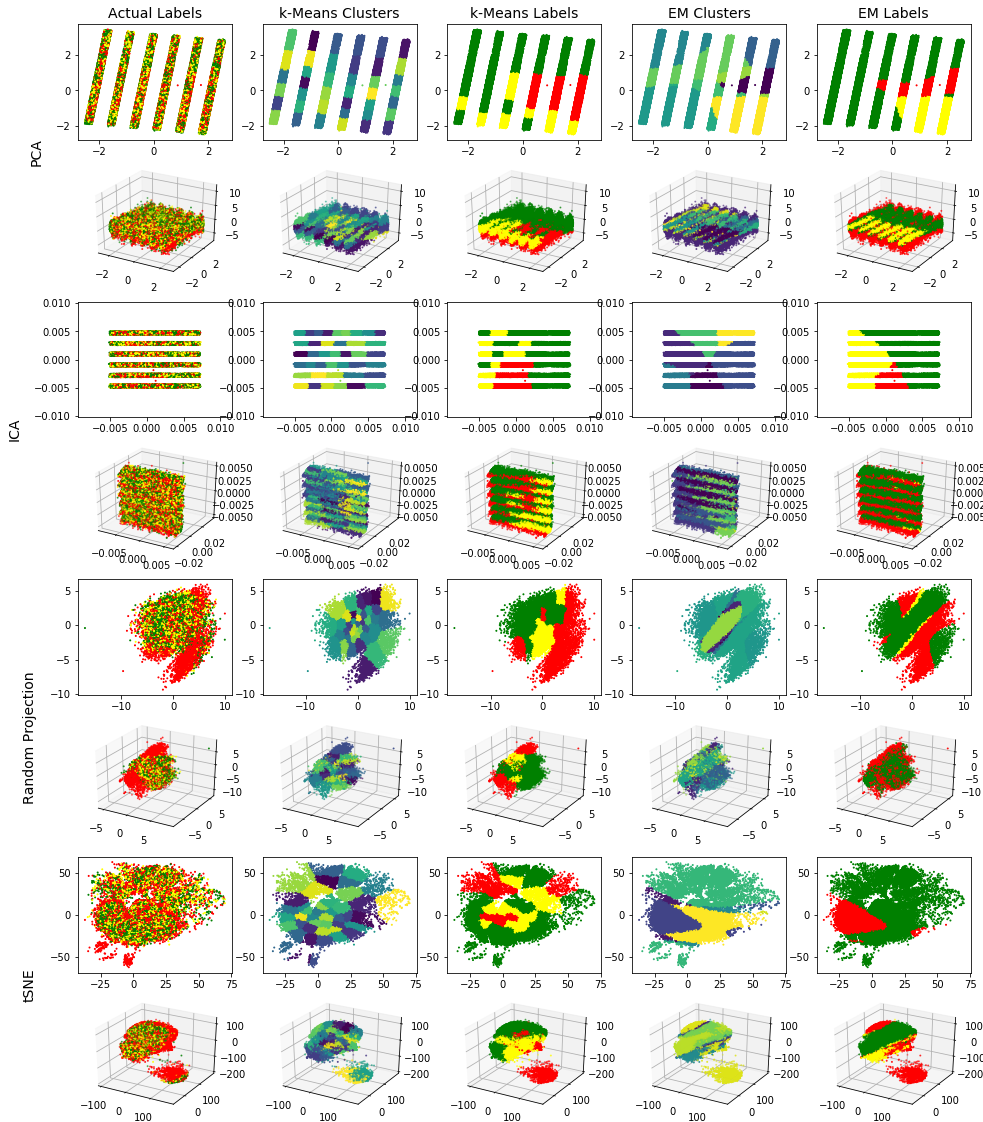

In [291]:
fig = pyplot.figure(1, figsize=(16,20))

data = pca_cab_2d.transform(cab_observations_smp)
ax = fig.add_subplot(8, 5, 1)
pyplot.title('Actual Labels', fontsize=14)
ax.annotate('PCA', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, -70),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', rotation=90)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in cab_categories_smp], s=1)

clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), cab_categories_smp, KM_CLUSTER_COUNT)
ax = fig.add_subplot(8, 5, 2)
pyplot.title('k-Means Clusters', fontsize=14)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 3)
pyplot.title('k-Means Labels', fontsize=14)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), cab_categories_smp, EM_CLUSTER_COUNT)
ax = fig.add_subplot(8, 5, 4)
pyplot.title('EM Clusters', fontsize=14)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 5)
pyplot.title('EM Labels', fontsize=14)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 6, projection='3d')
data = pca_cab_3d.transform(cab_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in cab_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 7, projection='3d')
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), cab_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 8, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 9, projection='3d')
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), cab_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 10, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 11)
ax.annotate('ICA', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, -70),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', rotation=90)
data = ica_cab_2d.transform(cab_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in cab_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 12)
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), cab_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 13)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 14)
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), cab_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 15)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 16, projection='3d')
data = ica_cab_3d.transform(cab_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in cab_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 17, projection='3d')
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), cab_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 18, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 19, projection='3d')
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), cab_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 20, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 21)
ax.annotate('Random Projection', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, -100),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', rotation=90)
data = grp_cab_2d.transform(cab_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in cab_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 22)
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), cab_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 23)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 24)
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), cab_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 25)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 26, projection='3d')
data = grp_cab_3d.transform(cab_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in cab_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 27, projection='3d')
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), cab_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 28, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 29, projection='3d')
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), cab_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 30, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 31)
ax.annotate('tSNE', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, -70),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', rotation=90)
data = tSNE_cab_2d.transform(np.array(cab_observations_smp))
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in cab_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 32)
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), cab_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 33)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 34)
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), cab_categories_smp, EM_CLUSTER_COUNT)
pyplot.scatter([d[0] for d in data], [d[1] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 35)
pyplot.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 36, projection='3d')
data = tSNE_cab_3d.transform(np.array(cab_observations_smp))
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in cab_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 37, projection='3d')
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), cab_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 38, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 39, projection='3d')
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), cab_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 40, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)
pyplot.show()

In [38]:
pca_air_2d = PCA(n_components=2, copy=True, whiten=False, svd_solver="full", tol=0.0, iterated_power="auto", random_state=None).fit(air_observations_smp)

In [42]:
pca_air_3d = PCA(n_components=3, copy=True, whiten=False, svd_solver="full", tol=0.0, iterated_power="auto", random_state=None).fit(air_observations_smp)

In [46]:
ica_air_2d = FastICA(n_components=2, algorithm="parallel", whiten=True, fun="logcosh", fun_args={"alpha" : 1.0}, max_iter=200, tol=1e-4, w_init=None, random_state=None).fit(air_observations_smp)

In [50]:
ica_air_3d = FastICA(n_components=3, algorithm="parallel", whiten=True, fun="logcosh", fun_args={"alpha" : 1.0}, max_iter=200, tol=1e-4, w_init=None, random_state=None).fit(air_observations_smp)

In [54]:
grp_air_2d = GaussianRandomProjection(n_components=2, random_state=None).fit(air_observations_smp)

grp_air_3d = GaussianRandomProjection(n_components=3, random_state=None).fit(air_observations_smp)

In [67]:
high_dims = air_observations_smp.shape[1]
num_outputs = 2
perplexity = 30
tSNE_air_2d = Parametric_tSNE(high_dims, num_outputs, [perplexity])
tSNE_air_2d.fit(np.array(air_observations_smp))

high_dims = air_observations_smp.shape[1]
num_outputs = 3
perplexity = 30
tSNE_air_3d = Parametric_tSNE(high_dims, num_outputs, [perplexity])
tSNE_air_3d.fit(np.array(air_observations_smp))

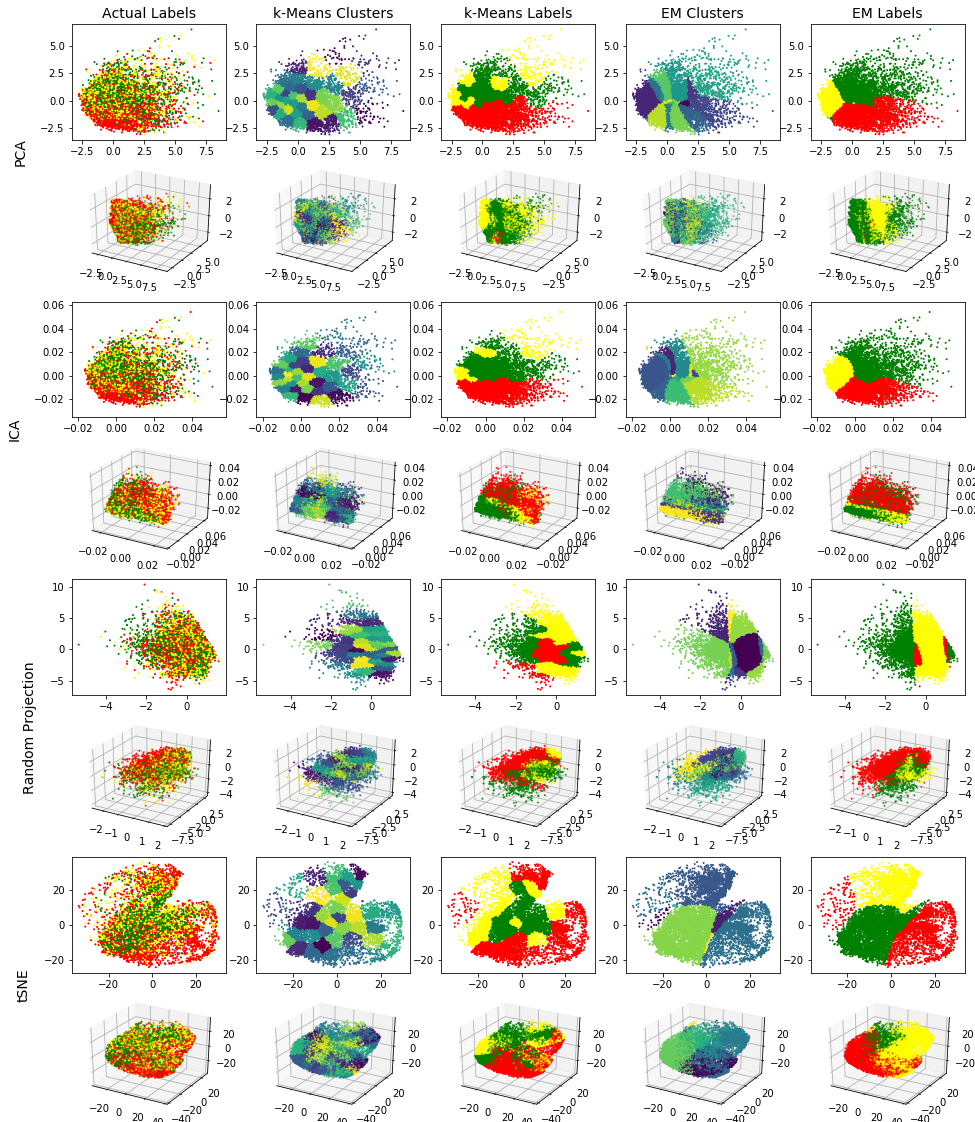

In [293]:
fig = pyplot.figure(1, figsize=(16,20))

ax = fig.add_subplot(8, 5, 1)
pyplot.title('Actual Labels', fontsize=14)
ax.annotate('PCA', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, -70),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', rotation=90)
data = pca_air_2d.transform(air_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in air_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 2)
pyplot.title('k-Means Clusters', fontsize=14)
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), air_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 3)
pyplot.title('k-Means Labels', fontsize=14)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 4)
pyplot.title('EM Clusters', fontsize=14)
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), air_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 5)
pyplot.title('EM Labels', fontsize=14)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 6, projection='3d')
data = pca_air_3d.transform(air_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in air_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 7, projection='3d')
data = pca_air_3d.transform(air_observations_smp)
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), cab_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 8, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 9, projection='3d')
data = pca_air_3d.transform(air_observations_smp)
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), cab_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 10, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 11)
ax.annotate('ICA', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, -70),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', rotation=90)
data = ica_air_2d.transform(air_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in air_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 12)
data = ica_air_2d.transform(air_observations_smp)
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), air_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 13)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 14)
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), air_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 15)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 16, projection='3d')
data = ica_air_3d.transform(air_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in air_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 17, projection='3d')
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), air_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 18, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 19, projection='3d')
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), air_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 20, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)


ax = fig.add_subplot(8, 5, 21)
ax.annotate('Random Projection', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, -90),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', rotation=90)
data = grp_air_2d.transform(air_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in air_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 22)
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), air_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 23)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 24)
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), air_categories_smp, EM_CLUSTER_COUNT)
pyplot.scatter([d[0] for d in data], [d[1] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 25)
pyplot.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 26, projection='3d')
data = grp_air_3d.transform(air_observations_smp)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in air_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 27, projection='3d')
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), air_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 28, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 29, projection='3d')
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), air_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 30, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)


ax = fig.add_subplot(8, 5, 31)
ax.annotate('tSNE', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, -70),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=14, ha='right', va='center', rotation=90)
data = tSNE_air_2d.transform(np.array(air_observations_smp))
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in air_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 32)
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), air_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 33)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 34)
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), air_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 35)
ax.scatter([d[0] for d in data], [d[1] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 36, projection='3d')
data = tSNE_air_3d.transform(np.array(air_observations_smp))

ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in air_categories_smp], s=1)

ax = fig.add_subplot(8, 5, 37, projection='3d')
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(data)
pred_classes, counts = getPredictionClasses(clusters.predict(data), air_categories_smp, KM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=clusters.predict(data), s=1)

ax = fig.add_subplot(8, 5, 38, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in clusters.predict(data)]], s=1)

ax = fig.add_subplot(8, 5, 39, projection='3d')
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(data)
pred_classes, counts = getPredictionClasses(mixtures.predict(data), air_categories_smp, EM_CLUSTER_COUNT)
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], c=mixtures.predict(data), s=1)

ax = fig.add_subplot(8, 5, 40, projection='3d')
ax.scatter([d[0] for d in data], [d[1] for d in data], [d[2] for d in data], color=[colors[c] for c in [pred_classes[p] for p in mixtures.predict(data)]], s=1)
pyplot.show()

In [ ]:
################################
###    NN w/ Dim Reduction   ###
################################

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [141]:
cross_val_score(MLPClassifier(hidden_layer_sizes=(200,)), cab_observations_smp, cab_categories_smp, cv=3)

/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.96352073, 0.96958061, 0.96054842])

In [359]:
np.mean([0.96352073, 0.96958061, 0.96054842])

0.96454992

In [142]:
cross_val_score(MLPClassifier(hidden_layer_sizes=(200,)), air_observations_smp, air_categories_smp, cv=3)

array([0.59778044, 0.58008398, 0.58793517])

In [143]:
cab_observations_smp.shape

(100000, 9)

In [144]:
def pca_nn(xs, ys):
    accuracies = []
    for dim_count in range(1, xs.shape[1]+1):
        dim_reduced_xs = pca_cab = PCA(n_components=dim_count, copy=True, whiten=False, svd_solver="full", tol=0.0, iterated_power="auto", random_state=None).fit_transform(xs)
        accuracies.append(cross_val_score(MLPClassifier(hidden_layer_sizes=(200,)), dim_reduced_xs, ys, cv=3))
    return accuracies

In [145]:
pca_nn(cab_observations_smp, cab_categories_smp)

[array([0.35654287, 0.35282294, 0.35203408]),
 array([0.37259255, 0.3701326 , 0.37123485]),
 array([0.4198416 , 0.41717166, 0.41692668]),
 array([0.44036119, 0.42056159, 0.41839674]),
 array([0.59461811, 0.59629807, 0.5949238 ]),
 array([0.66796664, 0.66472671, 0.66338654]),
 array([0.73552529, 0.73891522, 0.73673947]),
 array([0.9849403 , 0.98905022, 0.98526941]),
 array([0.98560029, 0.98050039, 0.9825993 ])]

In [353]:
pca_nn_accuracies = np.array([[0.35654287, 0.35282294, 0.35203408],
 [0.37259255, 0.3701326 , 0.37123485],
 [0.4198416 , 0.41717166, 0.41692668],
 [0.44036119, 0.42056159, 0.41839674],
 [0.59461811, 0.59629807, 0.5949238 ],
 [0.66796664, 0.66472671, 0.66338654],
 [0.73552529, 0.73891522, 0.73673947],
 [0.9849403 , 0.98905022, 0.98526941],
 [0.98560029, 0.98050039, 0.9825993]])

In [361]:
cab_observations_smp.shape

(100000, 9)

In [360]:
np.mean(pca_nn_accuracies, axis=1)

array([0.35379996, 0.37132   , 0.41797998, 0.42643984, 0.59527999,
       0.66535996, 0.73705999, 0.98641998, 0.98289999])

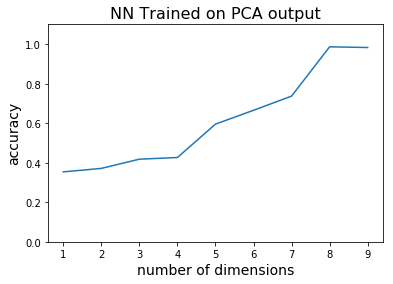

In [368]:
pyplot.title("NN Trained on PCA output", fontsize=16)
pyplot.xlabel("number of dimensions", fontsize=14)
pyplot.ylabel("accuracy", fontsize=14)
pyplot.ylim(0, 1.1)
pyplot.plot(range(1, len(pca_nn_accuracies)+1), np.mean(pca_nn_accuracies, axis=1))

In [146]:
def ica_nn(xs, ys):
    accuracies = []
    for dim_count in range(1, xs.shape[1]+1):
        dim_reduced_xs = FastICA(n_components=dim_count, algorithm="parallel", whiten=True, fun="logcosh", fun_args={"alpha" : 1.0}, max_iter=200, tol=1e-4, w_init=None, random_state=None).fit_transform(xs)
        accuracies.append(cross_val_score(MLPClassifier(hidden_layer_sizes=(200,)), dim_reduced_xs, ys, cv=3))
        print accuracies[-1]
    return accuracies

In [147]:
ica_nn(cab_observations_smp, cab_categories_smp)

[0.35096298 0.35423292 0.35515421]
[0.37028259 0.36794264 0.37336493]
[0.41435171 0.40805184 0.40531621]
[0.41417172 0.4051419  0.4125465 ]
[0.58456831 0.58642827 0.58550342]
[0.63703726 0.63472731 0.63074523]
[0.71179576 0.71920562 0.71231849]
[0.94147117 0.92083158 0.91914677]
[0.88714226 0.91837163 0.96465859]


[array([0.35096298, 0.35423292, 0.35515421]),
 array([0.37028259, 0.36794264, 0.37336493]),
 array([0.41435171, 0.40805184, 0.40531621]),
 array([0.41417172, 0.4051419 , 0.4125465 ]),
 array([0.58456831, 0.58642827, 0.58550342]),
 array([0.63703726, 0.63472731, 0.63074523]),
 array([0.71179576, 0.71920562, 0.71231849]),
 array([0.94147117, 0.92083158, 0.91914677]),
 array([0.88714226, 0.91837163, 0.96465859])]

In [364]:
ica_nn_accuracies = np.array([[0.35096298, 0.35423292, 0.35515421],
[0.37028259, 0.36794264, 0.37336493],
[0.41435171, 0.40805184, 0.40531621],
[0.41417172, 0.4051419,  0.4125465 ],
[0.58456831, 0.58642827, 0.58550342],
[0.63703726, 0.63472731, 0.63074523],
[0.71179576, 0.71920562, 0.71231849],
[0.94147117, 0.92083158, 0.91914677],
[0.88714226, 0.91837163, 0.96465859]])

In [365]:
np.mean(ica_nn_accuracies, axis=1)

array([0.35345004, 0.37053005, 0.40923992, 0.41062004, 0.5855    ,
       0.63416993, 0.71443996, 0.92714984, 0.92339083])

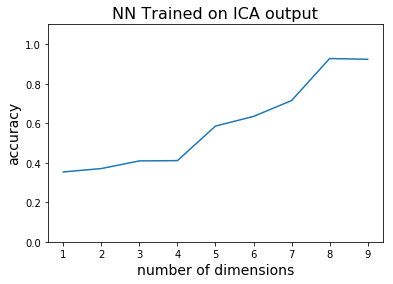

In [369]:
pyplot.title("NN Trained on ICA output", fontsize=16)
pyplot.xlabel("number of dimensions", fontsize=14)
pyplot.ylabel("accuracy", fontsize=14)
pyplot.ylim(0, 1.1)
pyplot.plot(range(1, len(ica_nn_accuracies)+1), np.mean(ica_nn_accuracies, axis=1))

In [370]:
def grp_nn(xs, ys):
    accuracies = []
    for dim_count in range(1, 2*xs.shape[1]+1):
        dim_reduced_xs = GaussianRandomProjection(n_components=dim_count, random_state=None).fit_transform(xs)
        accuracies.append(cross_val_score(MLPClassifier(hidden_layer_sizes=(200,)), dim_reduced_xs, ys, cv=3))
        print accuracies[-1]
    return accuracies

In [372]:
grp_nn_accuracies = grp_nn(cab_observations_smp, cab_categories_smp)

[0.3698626  0.37595248 0.37678507]
[0.40607188 0.41144177 0.41389656]
[0.54925901 0.54307914 0.54359174]
[0.46232075 0.46262075 0.46720869]
[0.56731865 0.5602088  0.56045242]
[0.77860443 0.77248455 0.76131045]
[0.86560269 0.87562249 0.86910476]
[0.73648527 0.73903522 0.73520941]
[0.75622488 0.75433491 0.75189008]


/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (9 < 10).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


[0.89833203 0.8851623  0.90579623]


/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (9 < 11).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


[0.88474231 0.88225235 0.87636505]


/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (9 < 12).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


[0.95107098 0.96880062 0.97089884]


/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (9 < 13).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


[0.95788084 0.97165057 0.96900876]


/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (9 < 14).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


[0.94075118 0.93079138 0.93669747]


/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (9 < 15).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


[0.96898062 0.96892062 0.96468859]


/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (9 < 16).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


[0.9700906  0.97828043 0.97377895]


/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (9 < 17).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


[0.97474051 0.95737085 0.97596904]


/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (9 < 18).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


[0.94558109 0.94096118 0.94869795]


In [371]:
grp_nn_accuracies_bak = grp_nn_accuracies[:]

In [373]:
np.mean(grp_nn_accuracies, axis=1)

array([0.37420005, 0.41047007, 0.54530997, 0.46405006, 0.56265996,
       0.77079981, 0.87010998, 0.73690997, 0.75414995, 0.89643019,
       0.8811199 , 0.96359015, 0.96618006, 0.93608001, 0.96752994,
       0.97404999, 0.96936013, 0.94508007])

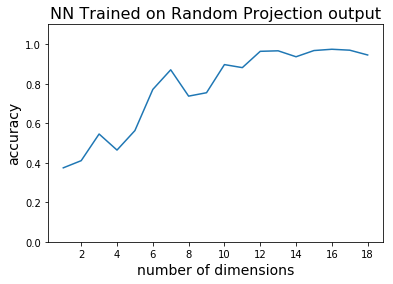

In [375]:
pyplot.title("NN Trained on Random Projection output", fontsize=16)
pyplot.xlabel("number of dimensions", fontsize=14)
pyplot.xticks(range(2, 19, 2))
pyplot.ylabel("accuracy", fontsize=14)
pyplot.ylim(0, 1.1)
pyplot.plot(range(1, len(grp_nn_accuracies)+1), np.mean(grp_nn_accuracies, axis=1))

In [154]:
def tsne_nn(xs, ys):
    accuracies = []
    for dim_count in range(1, xs.shape[1]+1):
        tSNE_clf = Parametric_tSNE(xs.shape[1], dim_count, [30])
        tSNE_clf.fit(np.array(xs))
        dim_reduced_xs = tSNE_clf.transform(np.array(xs))
        accuracies.append(cross_val_score(MLPClassifier(hidden_layer_sizes=(200,)), dim_reduced_xs, ys, cv=3))
        print accuracies[-1]
    return accuracies

In [155]:
tsne_nn_accuracies = tsne_nn(cab_observations_smp, cab_categories_smp)

[0.37226255 0.3698026  0.37279491]
[0.3951221  0.40472191 0.40138606]
[0.42689146 0.40901182 0.41329653]
[0.47846043 0.45215096 0.49144966]
[0.59533809 0.60133797 0.60527421]
[0.59272815 0.6100378  0.6026041 ]
[0.60265795 0.60247795 0.59267371]
[0.600018   0.60544789 0.60668427]
[0.6099778  0.60643787 0.6026041 ]


In [376]:
np.mean(tsne_nn_accuracies, axis=1)

array([0.37162002, 0.40041002, 0.41639994, 0.47402035, 0.60065009,
       0.60179002, 0.59926987, 0.60405005, 0.60633993])

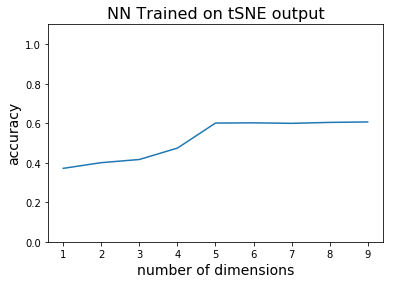

In [377]:
pyplot.title("NN Trained on tSNE output", fontsize=16)
pyplot.xlabel("number of dimensions", fontsize=14)
pyplot.ylabel("accuracy", fontsize=14)
pyplot.ylim(0, 1.1)
pyplot.plot(range(1, len(tsne_nn_accuracies)+1), np.mean(tsne_nn_accuracies, axis=1))

In [168]:
################################
###  NN w/ Cluster Features  ###
################################

In [169]:
from sklearn.preprocessing import OneHotEncoder

In [170]:
clusters = KMeans(n_clusters=KM_CLUSTER_COUNT, init='random', n_init=10, max_iter=300, tol=1e-4, precompute_distances='auto', verbose=0, random_state=None, copy_x=True).fit(cab_observations_smp)

array([[5.00501652, 2.21595511, 4.189342  , 4.21981729, 3.50699138,
        1.83916891, 4.38705583, 4.27726061, 3.33568243, 5.16344322,
        4.06630206, 3.31964887, 3.56882993, 2.10778771, 3.96428709,
        5.48864988, 3.40398822, 5.38756851, 4.52450199, 2.89471781,
        3.39999832, 2.98871812, 4.75585866, 4.51725832, 4.19976558,
        5.47326075, 1.3060655 , 3.18426238, 6.12269847, 3.52932622,
        5.62686749, 5.06572706, 4.55689206, 2.74510396, 2.15150449,
        1.69726204, 1.72058909, 3.98891489, 3.48823481, 4.39547595],
       [5.54866948, 1.90279719, 4.48480785, 5.51052219, 5.01006731,
        2.56875611, 2.98766704, 4.38209371, 4.01976879, 4.06170885,
        5.37103088, 1.68101742, 4.99052979, 2.69624589, 2.57059521,
        4.32084949, 3.64843318, 5.47319163, 4.34712061, 4.68274835,
        1.75147641, 3.31715128, 3.58322548, 4.44598338, 4.66344344,
        4.50461559, 4.03978435, 3.52979341, 6.18683661, 4.41931913,
        5.57947805, 5.72289786, 3.34604394, 4.5

In [195]:
def cluterIndecesToOneHotEncoding(cluster_idxs):
    return OneHotEncoder(max(cluster_idxs)+1).fit_transform(cluster_idxs.reshape(1, -1)).toarray().reshape(len(cluster_idxs), max(cluster_idxs)+1)

In [196]:
cluterIndecesToOneHotEncoding(clusters.predict(cab_observations_smp[:10]))

/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [198]:
cluster_data = cluterIndecesToOneHotEncoding(clusters.predict(cab_observations_smp))
cross_val_score(MLPClassifier(hidden_layer_sizes=(200,)), cluster_data, cab_categories_smp, cv=3)

/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


array([0.43106138, 0.42830143, 0.42928717])

In [381]:
np.mean([0.43106138, 0.42830143, 0.42928717])

0.4295499933333333

In [199]:
cluster_distance_data = clusters.transform(cab_observations_smp)
cross_val_score(MLPClassifier(hidden_layer_sizes=(200,)), cluster_distance_data, cab_categories_smp, cv=3)

array([0.68596628, 0.65743685, 0.63548542])

In [382]:
np.mean([0.68596628, 0.65743685, 0.63548542])

0.6596295166666667

In [378]:
mixtures = GaussianMixture(n_components=EM_CLUSTER_COUNT, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=5, init_params='random', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).fit(cab_observations_smp)

In [379]:
mixture_data = cluterIndecesToOneHotEncoding(mixtures.predict(cab_observations_smp))
cross_val_score(MLPClassifier(hidden_layer_sizes=(200,)), mixture_data, cab_categories_smp, cv=3)

/Users/donovanfm/Code/omscs7641-ml/pr2/.env/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


array([0.68551629, 0.68533629, 0.68603744])

In [383]:
np.mean([0.68551629, 0.68533629, 0.68603744])

0.6856300066666666

In [380]:
mixture_probability_data = mixtures.predict_proba(cab_observations_smp)
cross_val_score(MLPClassifier(hidden_layer_sizes=(200,)), mixture_probability_data, cab_categories_smp, cv=3)

array([0.8598128 , 0.85969281, 0.86451458])

In [384]:
np.mean([0.8598128 , 0.85969281, 0.86451458])

0.8613400633333335

In [ ]:
array([0.70204596, 0.70558589, 0.70922837])
array([0.87091258, 0.86824264, 0.87141486])